(rasch-implementation-notebook)=
# Implementazione 

In [34]:
source("../_common.R")

suppressPackageStartupMessages({
    library("tidyverse")
    library("eRm")
    library("mirt")
    library("grid")
    library("TAM")
    # devtools::install_github("masurp/ggmirt")
    library("ggmirt")
    library("psychotools")
    library("latex2exp")
    library("ShinyItemAnalysis")
    # install.packages("remotes")
    # remotes::install_github("CambridgeAssessmentResearch/unimirt")
    library("unimirt")
    })

Consideriamo nuovamente il set di dati `data.fims.Aus.Jpn.scored`.

In [2]:
data(data.fims.Aus.Jpn.scored, package = "TAM")
fims <- data.fims.Aus.Jpn.scored

In [3]:
glimpse(fims)

Rows: 6,371
Columns: 16
$ SEX     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ M1PTI1  <dbl> 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,…
$ M1PTI2  <dbl> 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,…
$ M1PTI3  <dbl> 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,…
$ M1PTI6  <dbl> 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,…
$ M1PTI7  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ M1PTI11 <dbl> 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,…
$ M1PTI12 <dbl> 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ M1PTI14 <dbl> 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,…
$ M1PTI17 <dbl> 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,…
$ M1PTI18 <dbl> 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,…
$ M1PTI19 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ M1PTI21 <dbl> 

Oltre alle risposte sui 14 item di matematica, il data set contiene anche informazioni sul genere del partecipate e sul paese d'origine.

In [4]:
fims$SEX <- as.factor(fims$SEX)
levels(fims$SEX) <- c("male", "female")
fims$country <- as.factor(fims$country)
levels(fims$country) <- c("Australia", "Japan")

In [5]:
summary(fims[, c("SEX", "country")])

     SEX            country    
 male  :3319   Australia:4320  
 female:3052   Japan    :2051  

Per semplicità, esamineremo qui le risposte dei primi 400 partecipanti. Per facilitare la manipolazione dei dati, cambiamo il nome delle colonne con le seguenti istruzioni.

In [6]:
responses <- fims[1:400, 2:15]
colnames(responses) <- gsub("M1PTI", "I", colnames(responses))
glimpse(responses)

Rows: 400
Columns: 14
$ I1  <dbl> 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, …
$ I2  <dbl> 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, …
$ I3  <dbl> 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, …
$ I6  <dbl> 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, …
$ I7  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ I11 <dbl> 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, …
$ I12 <dbl> 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ I14 <dbl> 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, …
$ I17 <dbl> 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, …
$ I18 <dbl> 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, …
$ I19 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ I21 <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, …
$ I22 <dbl> 0, 0, 

In [7]:
gender <- as.factor(fims$SEX[1:400])
levels(gender) <- c("male", "female")

summary(gender)

male female 
   246    154

Un'analisi IRT può essere paragonata a un'analisi fattoriale. Dopo avere adattato il modello di Rasch ai dati usando `mirt()`, possiamo usare la funzione `summary()` per ottenere quella che viene definita "soluzione fattoriale", che include i carichi fattoriali (F1) e le comunalità (h2). Le comunalità, essendo carichi fattoriali al quadrato, sono interpretate come la varianza spiegata in un item dal tratto latente. Nel caso presente, tutti gli item hanno una relazione sostanziale (saturazioni $\approx$ .50) con il tratto latente, indicando che il tratto latente è un buon indicatore della varianza osservata in quegli item. Questo suggerisce che il tratto latente è in grado di spiegare una porzione almento moderata della varianza nei punteggi degli item.

## Unidimensionalità

I modelli IRT unidimensionali assumono che tutti gli item misurino una singola variabile latente continua. Ci sono diverse modalità per testare l'assunzione di unidimensionalità. Ad esempio, possiamo stimare l'Omega gerarchico di McDonald ($\omega_h$), che concettualmente riflette la percentuale di varianza nei punteggi della scala attribuita a un fattore generale. Un valore di $\omega_h$ > .70 è di solito usato come punto di riferimento arbitrario.

In [120]:
summary(omega(responses, plot = F))

Omega 
omega(m = responses, plot = F)
Alpha:                 0.64 
G.6:                   0.66 
Omega Hierarchical:    0.5 
Omega H asymptotic:    0.72 
Omega Total            0.69 

With eigenvalues of:
   g  F1*  F2*  F3* 
1.56 0.25 0.84 0.47 
The degrees of freedom for the model is 52  and the fit was  0.12 
The number of observations was  400  with Chi Square =  46.72  with prob <  0.68 

The root mean square of the residuals is  0.03 
The df corrected root mean square of the residuals is  0.04 

RMSEA and the  0.9 confidence intervals are  0 0 0.026
BIC =  -264.84Explained Common Variance of the general factor =  0.5 

 Total, General and Subset omega for each subset
                                                 g  F1*  F2*  F3*
Omega total for total scores and subscales    0.69 0.57 0.44 0.42
Omega general for total scores and subscales  0.50 0.46 0.21 0.18
Omega group for total scores and subscales    0.12 0.11 0.22 0.24


Nel caso presente, $\omega_h$ è solo uguale a 0.5. Procediamo comunque per gli scopi di questo tutorial.

## 1PL (RAsch) model

In [124]:
mirt_rm <- mirt(responses, 1, itemtype = "Rasch", verbose = FALSE)
summary(mirt_rm)

       F1    h2
I1  0.488 0.238
I2  0.488 0.238
I3  0.488 0.238
I6  0.488 0.238
I7  0.488 0.238
I11 0.488 0.238
I12 0.488 0.238
I14 0.488 0.238
I17 0.488 0.238
I18 0.488 0.238
I19 0.488 0.238
I21 0.488 0.238
I22 0.488 0.238
I23 0.488 0.238

SS loadings:  3.33 
Proportion Var:  0.238 

Factor correlations: 

   F1
F1  1


Nell'IRT, tuttavia, siamo generalmente più interessati ai parametri specifici IRT (discriminazione e difficoltà). Questi parametri possono essere estratti dall’oggetto creato da mirt() nel seguente modo:

In [125]:
params_rm <- coef(mirt_rm, IRTpars = TRUE, simplify = TRUE)
round(params_rm$items, 2) 

,a,b,g,u
I1,1,-1.10,0,1
I2,1,-1.25,0,1
I3,1,-2.04,0,1
I6,1,-0.05,0,1
I7,1,2.53,0,1
I11,1,-1.25,0,1
I12,1,0.81,0,1
I14,1,-0.50,0,1
I17,1,1.33,0,1
I18,1,-0.40,0,1


- $a$ (Discriminazione): Il parametro $a$ (discriminazione) rappresenta la pendenza delle curve caratteristiche degli item (ICC - Item Characteristic Curves). Una pendenza elevata (valore alto di $a$) indica che l'item è molto efficace nel distinguere tra individui con livelli diversi del tratto latente (ad esempio, abilità). Questo significa che piccole variazioni nel tratto latente portano a grandi cambiamenti nella probabilità di rispondere correttamente all'item. Una pendenza bassa (valore basso di $a$) suggerisce che l’item non è altrettanto efficace nel discriminare tra livelli diversi del tratto latente. In questo caso, anche ampie variazioni nel tratto latente comportano solo piccoli cambiamenti nella probabilità di risposta corretta. Nel modello di Rasch si assume che tutti gli item abbiano la stessa pendenza (o potere discriminante), e quindi tutti i valori di 
$a$ sono fissati allo stesso valore (ovvero 1).
- $b$ (Difficoltà): Rappresenta il livello di abilità a cui un rispondente ha il 50% di probabilità di rispondere correttamente all'item. Un valore positivo indica un item più difficile (richiede un livello di abilità superiore per rispondere correttamente), mentre un valore negativo indica un item più facile. Ad esempio, I7 ha un valore di difficoltà di 2.53, il che significa che è relativamente difficile, mentre I3, con un valore di -2.04, è relativamente facile.
- $g$ (Probabilità di Indovinare): In questo modello, la probabilità di indovinare è impostata a zero per tutti gli item, il che è coerente con il modello di Rasch, dove non si considera la possibilità di indovinare correttamente un item per caso.

Effettuiamo un confronto tra il modello di Rash e il modello 2PL.

In [130]:
mirt_2pl <- mirt(responses, 1, "2PL")
anova(mirt_rm, mirt_2pl)

Iteration: 14, Log-Lik: -2759.601, Max-Change: 0.00009


,AIC,SABIC,HQ,BIC,logLik,X2,df,p
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mirt_rm,5662.973,5675.249,5686.683,5722.845,-2816.487,NA,NA,NA
mirt_2pl,5575.203,5598.118,5619.462,5686.964,-2759.601,113.7703,13,0


Effettuiamo il confronto tra i modelli 2PL e 3PL.

In [129]:
mirt_3pl <- mirt(responses, 1, "3PL")
anova(mirt_2pl, mirt_3pl)

Iteration: 41, Log-Lik: -2740.210, Max-Change: 0.00009


,AIC,SABIC,HQ,BIC,logLik,X2,df,p
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mirt_2pl,5575.203,5598.118,5619.462,5686.964,-2759.601,NA,NA,NA
mirt_3pl,5564.419,5598.792,5630.808,5732.061,-2740.210,38.78358,14,0.0003938891


Il modello 2PL deriva dal modello 3PL impostando un tipo specifico di parametro, ovvero il parametro di guessing, a un valore di 0. Il parametro di guessing nel modello 3PL rappresenta la probabilità che un candidato indovini correttamente un item, anche se non possiede la competenza richiesta per rispondere. Poiché il parametro di guessing può assumere valori tra 0 e 1, ciò significa che il modello ristretto nella nostra analisi, che è il modello 2PL, deriva dal modello più generale impostando un parametro a un valore ai limiti del suo spazio parametrico. In questo scenario, il classico test del rapporto di verosimiglianza può portare a risultati inaccurati. 

Pertanto, per interpretare il confronto tra i due modelli utilizziamo solo gli indici di informazione per confrontare il modello 2PL e il modello 3PL. Mentre l'AIC indica una preferenza per il modello 3PL (forse a causa del guessing presente in alcuni item), il BIC mostra una lieve preferenza per il modello 2PL più semplice, poiché penalizza maggiormente l'uso di un maggior numero di parametri nel modello.

## Interpretazione dei parametri

In un certo senso, l'analisi IRT può essere paragonata all'analisi fattoriale nella Teoria Classica dei Test (CTT). Utilizzando la funzione `summary()`, otteniamo quella che è nota come soluzione fattoriale, che include i carichi fattoriali (`F1`) e le comunalità (`h2`). Queste ultime, essendo i carichi fattoriali al quadrato, vengono interpretate come la varianza spiegata dall'attributo latente in ciascun item. Nella maggior parte dei casi, quasi tutti gli item mostrano una relazione sostanziale (carichi > 0.50) con il tratto latente.

In [22]:
# Factor solution
summary(mirt_3pl)

        F1    h2
I1   0.638 0.407
I2   0.843 0.711
I3   0.647 0.419
I6   0.665 0.442
I7   0.564 0.318
I11  0.658 0.433
I12  0.781 0.611
I14  0.427 0.183
I17  0.875 0.766
I18  0.391 0.153
I19  0.735 0.540
I21 -0.951 0.905
I22  0.983 0.967
I23  0.691 0.477

SS loadings:  7.33 
Proportion Var:  0.524 

Factor correlations: 

   F1
F1  1


Nell'IRT, tuttavia, siamo solitamente più interessati ai parametri effettivi dell'IRT come discusso sopra (discriminazione, difficoltà e probabilità di indovinare). Tali parametri possono essere estratti come segue:

In [23]:
params3PL <- coef(mirt_3pl, IRTpars = TRUE, simplify = TRUE)
round(params3PL$items, 2) 

,a,b,g,u
I1,1.41,-0.49,0.24,1
I2,2.67,-0.40,0.29,1
I3,1.44,-1.63,0.00,1
I6,1.51,0.01,0.02,1
I7,1.16,2.30,0.00,1
I11,1.49,-0.98,0.00,1
I12,2.13,1.28,0.21,1
I14,0.80,-0.59,0.00,1
I17,3.08,1.32,0.14,1
I18,0.72,-0.51,0.00,1


I valori dei parametri di pendenza (parametri `a`) variano da 0.80 a 9.18. Il parametro `a` è una misura di quanto bene un item differenzia individui con diversi livelli di abilità $\theta$. Valori più grandi, o pendenze più ripide, sono migliori per differenziare i rispondenti. La pendenza può anche essere interpretata come un indicatore della forza della relazione tra un item e un tratto latente, con valori di pendenza più alti che corrispondono a relazioni più forti.

Anche i parametri di difficoltà (parametro `b`) sono elencati per ciascun item. I parametri di difficoltà sono interpretati come il valore di $\theta$ che corrisponde a una probabilità del 50% di rispondere correttamente a (o al di sopra di tale posizione) un item. Nel caso presente, i parametri di difficoltà mostrano che gli item coprono un'ampia gamma del tratto latente.

## Valutazione del Test

Il primo strumento per la valutazione dei test che possiamo usare sono i metodi grafici. Il primo di questi, la mappa persona-item, mostra se il campione di persone copre l'intera gamma degli item e viceversa. Il secondo approccio, che consiste nel confrontare le ICC (Curve Caratteristiche dell'Item) teoriche ed empiriche, può aiutare a rilevare gli item che non si adattano bene. Il terzo, il test grafico, è un test visivo per il Funzionamento Differenziale degli Item (DIF).

### Mappa Persona-Item

Come già menzionato, i modelli IRT collocano sia le persone che gli item su una stessa scala latente, e la precisione delle stime dei parametri dipende dalla relazione tra la posizione delle persone e quella degli item su questa scala. La mappa persona-item offre una visualizzazione grafica di come gli item e le persone sono distribuiti lungo questo continuum latente. Affinché i parametri degli item possano essere stimati con precisione utilizzando i dati delle persone e viceversa, è cruciale che le difficoltà degli item coprano l'intera gamma delle abilità delle persone, e viceversa. In altre parole, gli item dovrebbero essere calibrati in modo tale da presentare una varietà di livelli di difficoltà che corrispondano alla diversa distribuzione delle abilità delle persone. Questa corrispondenza tra le difficoltà degli item e le abilità delle persone è fondamentale per garantire la validità e l'affidabilità dei modelli IRT utilizzati nelle valutazioni psicometriche.

La mappa persona-item (*person−item map*) si ottiene nel modo seguente.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


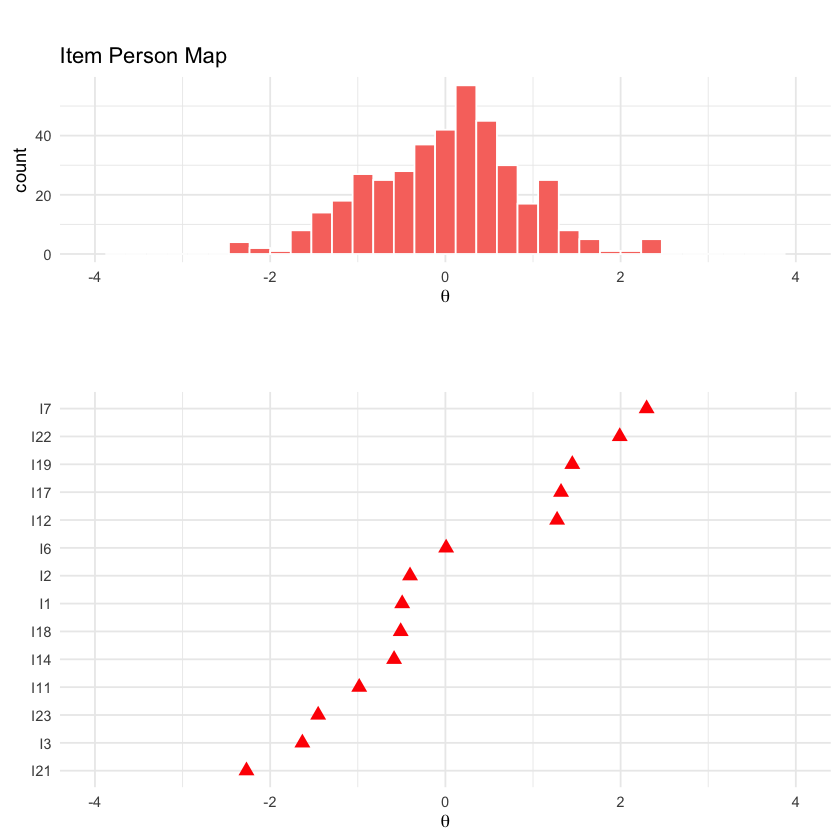

In [32]:
ggmirt::itempersonMap(mirt_3pl)

La parte superiore della mappa persona-item mostra un istogramma delle stime dei parametri di abilità, mentre la parte inferiore mostra le stime delle difficoltà per ciascun item del test. Per ogni item, la stima della difficoltà è indicata dalla posizione del punto sulla linea tratteggiata corrispondente a quell'item. Ad esempio, la difficoltà stimata per l'item 1 corrisponde alla posizione del punto sulla linea tratteggiata più in alto. La mappa persona-item offre un controllo visivo di coerenza per le stime del nostro modello IRT (Teoria della Risposta all'Item). Le stime delle abilità sono più accurate quando cadono nel mezzo della distribuzione dei parametri degli item e viceversa. Pertanto, idealmente, l'istogramma delle abilità e le stime delle difficoltà dovrebbero essere centrate sullo stesso punto e mostrare un'ampia sovrapposizione. Nel nostro test, questo sembra essere questo il caso.

### ICC Empiriche

La funzione `EmpiricalICCfit()` produce le Curve Caratteristiche degli Item (ICC) utilizzando un approccio empirico basato sui dati osservati. Le ICC sono grafici che mostrano la relazione tra la probabilità di risposta corretta degli individui agli item e il livello latente dell'attributo che si sta misurando, solitamente indicato come $\theta$.

La funzione calcola le probabilità empiriche di risposta corretta per ciascun item e ciascun livello di abilità $\theta$. Queste probabilità sono stimate direttamente dai dati osservati, senza fare alcuna assunzione su modelli specifici come nel caso dell'IRT.

Utilizzando le probabilità di risposta corretta calcolate, la funzione traccia le curve caratteristiche degli item per ogni item. Queste curve mostrano come la probabilità di risposta corretta varia al variare del livello di abilità $\theta$. Le ICC sono visualizzate graficamente con il livello di abilità $\theta$ sull'asse x e la probabilità di risposta corretta sull'asse y.

La forma delle ICC può variare a seconda delle caratteristiche degli item. Ad esempio, item più difficili avranno ICC con pendenza maggiore, mentre item più facili avranno ICC con pendenza minore. Inoltre, le ICC possono differire nella loro precisione nel descrivere la relazione tra abilità e probabilità di risposta corretta.

Consideriamo qui i risultati di tre item.

$plot1

$modelchartdat
   raw.score item.score
1          0  0.0000000
2          1  0.1046833
3          2  0.2223235
4          3  0.3359288
5          4  0.4497008
6          5  0.5688008
7          6  0.6902246
8          7  0.8002048
9          8  0.8836327
10         9  0.9352240
11        10  0.9646060
12        11  0.9813098
13        12  0.9912231
14        13  0.9979500
15        14  1.0000000

$empiricalchartdat
   raw.score item.score N.scoregroups N.Freq
1          1  0.0000000             1      7
2          2  0.2000000             2     10
3          3  0.2962963             3     27
4          4  0.4285714             4     35
5          5  0.6274510             5     51
6          6  0.7000000             6     50
7          7  0.7903226             7     62
8          8  0.8888889             8     63
9          9  0.8837209             9     43
10        10  1.0000000            10     32
11        11  1.0000000            11     12
12        12  1.0000000          

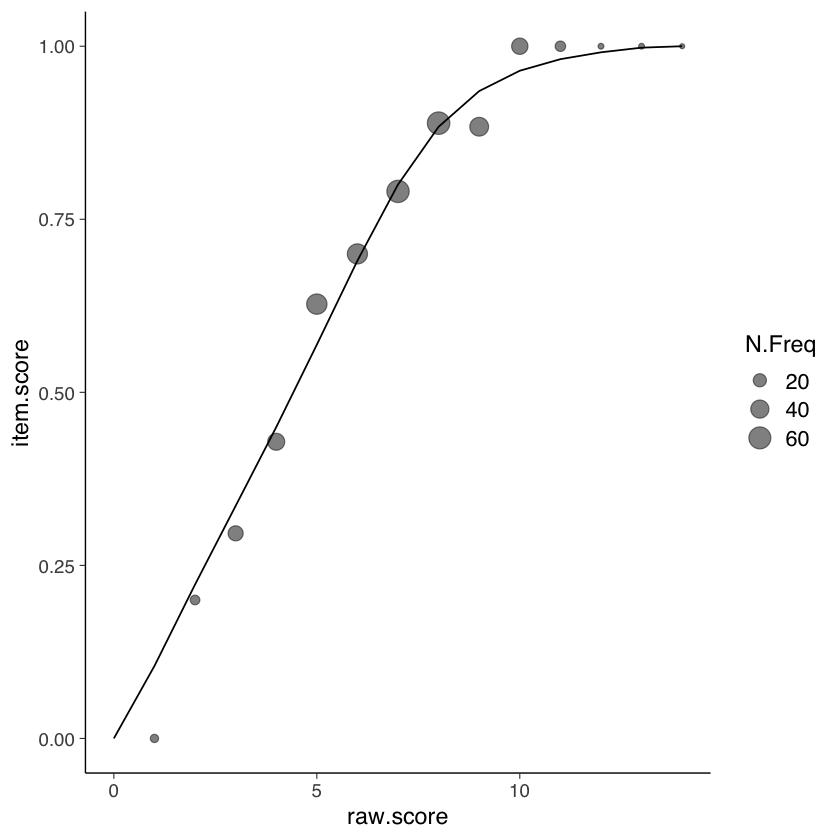

In [36]:
EmpiricalICCfit(mirt_3pl, 1)

$plot1

$modelchartdat
   raw.score item.score
1          0 0.00000000
2          1 0.08585882
3          2 0.18626536
4          3 0.28917120
5          4 0.41493576
6          5 0.57189475
7          6 0.73390256
8          7 0.86122450
9          8 0.93824926
10         9 0.97569185
11        10 0.99146967
12        11 0.99734605
13        12 0.99931738
14        13 0.99989096
15        14 1.00000000

$empiricalchartdat
   raw.score item.score N.scoregroups N.Freq
1          1  0.1428571             1      7
2          2  0.0000000             2     10
3          3  0.1851852             3     27
4          4  0.6000000             4     35
5          5  0.5490196             5     51
6          6  0.6600000             6     50
7          7  0.9032258             7     62
8          8  0.9365079             8     63
9          9  1.0000000             9     43
10        10  0.9687500            10     32
11        11  1.0000000            11     12
12        12  1.0000000          

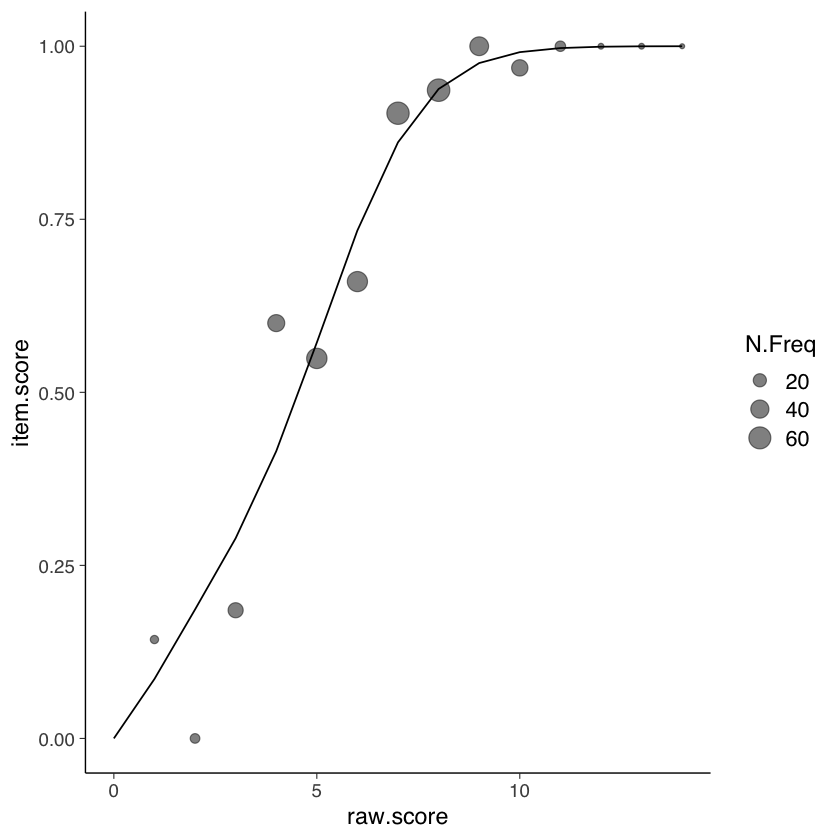

In [37]:
EmpiricalICCfit(mirt_3pl, 2)

$plot1

$modelchartdat
   raw.score item.score
1          0  0.0000000
2          1  0.1589840
3          2  0.1815978
4          3  0.1666414
5          4  0.1501485
6          5  0.1432927
7          6  0.1463269
8          7  0.1595127
9          8  0.1849686
10         9  0.2202570
11        10  0.2489529
12        11  0.2684831
13        12  0.2744363
14        13  0.3168341
15        14  1.0000000

$empiricalchartdat
   raw.score item.score N.scoregroups N.Freq
1          1  0.1428571             1      7
2          2  0.2000000             2     10
3          3  0.1851852             3     27
4          4  0.1142857             4     35
5          5  0.1960784             5     51
6          6  0.1000000             6     50
7          7  0.1774194             7     62
8          8  0.1904762             8     63
9          9  0.2093023             9     43
10        10  0.2187500            10     32
11        11  0.3333333            11     12
12        12  0.0000000          

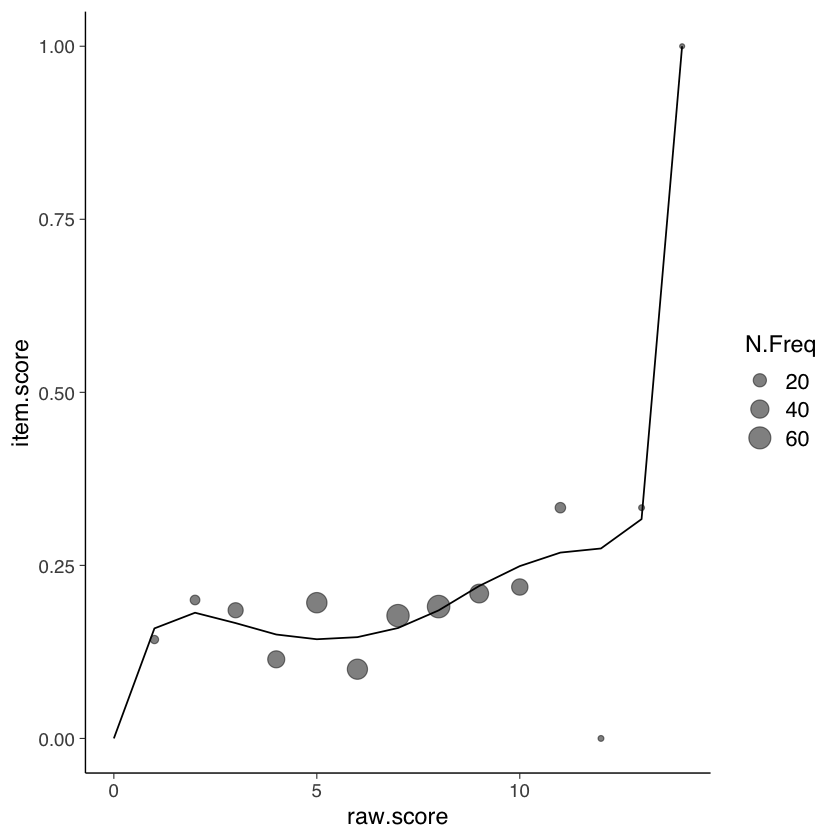

In [38]:
EmpiricalICCfit(mirt_3pl, 12)

È anche possibile visualizzare le ICC attese di tutti gli item del test come indicato di seguito. Questo grafico ci permette di esaminare come la difficoltà influenzi la probabilità che un candidato risponda correttamente a un item. Ricordiamo che la difficoltà di un item è definita come il livello di abilità in cui una persona ha una probabilità del 50% di rispondere correttamente all’item. Nel caso presente, l’item meno difficile è l’item 3 e l’item più difficile è l’item 7.

Mentre nel modello di Rasch le ICC attese sono parallele per definizione, nel modello 3PL le ICC non sono parallele e possono avere un asintoto inferiore diverso.

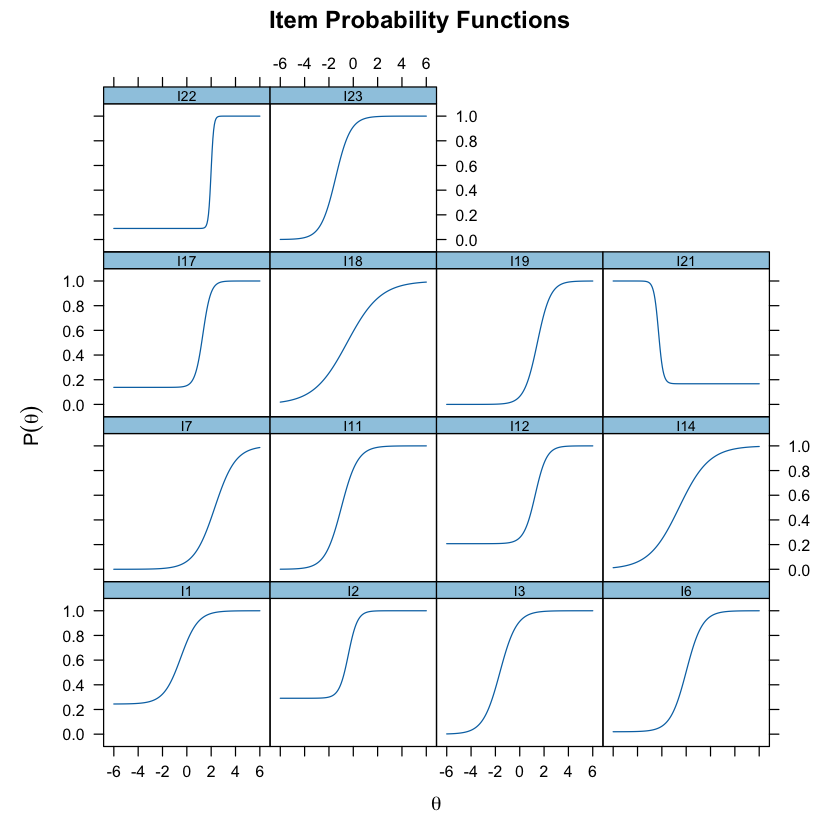

In [39]:
plot(mirt_3pl, type = "trace")

Oppure possiamo usare le seguenti funzioni:

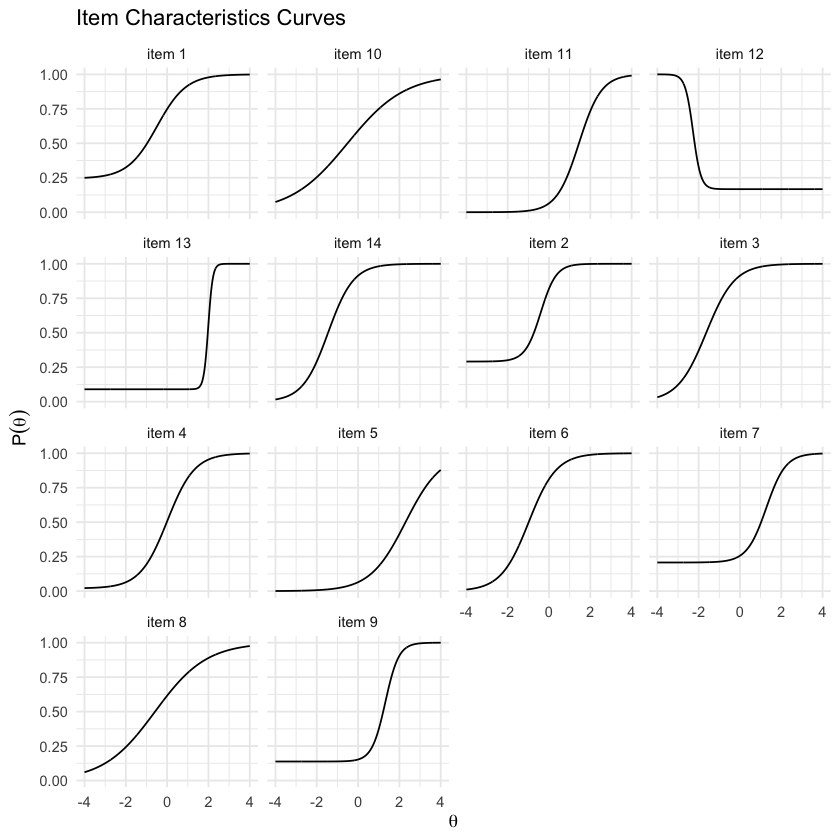

In [76]:
tracePlot(mirt_3pl)

Se vogliamo aggiungere l'intervallo di confidenza, procediamo come indicato di seguito.

Iteration: 16, Log-Lik: -2816.487, Max-Change: 0.00008

Calculating information matrix...


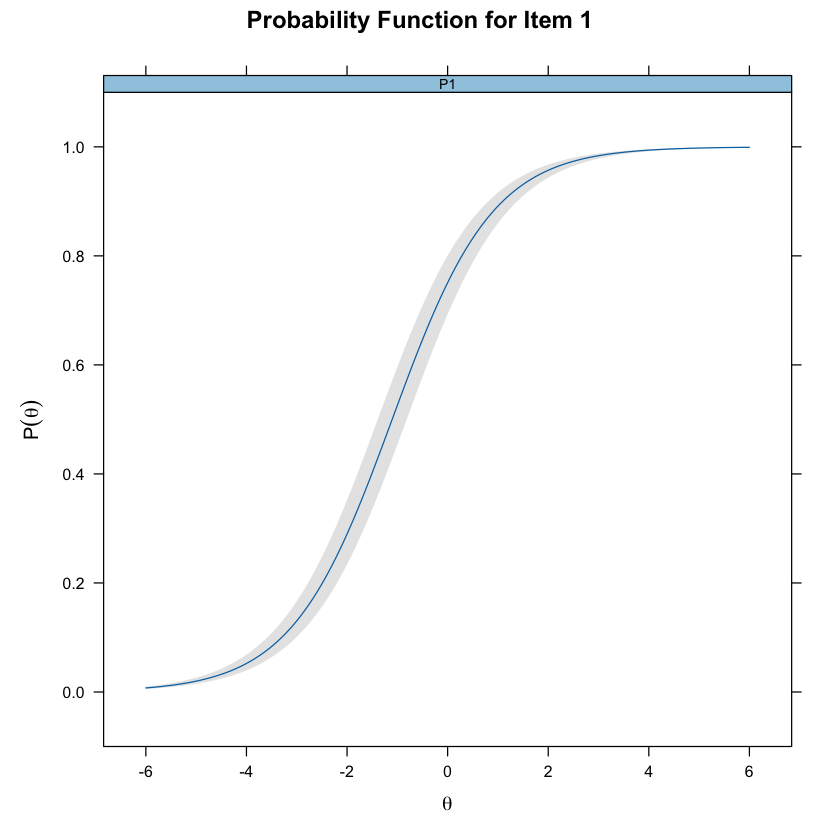

In [139]:
mirt_rm_se <- mirt::mirt(responses, 1, itemtype = "Rasch", SE = TRUE)
itemplot(mirt_rm_se, item = 1, type = "trace", CE = TRUE)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set3 is 12
Returning the palette you asked for with that many colors
”
Warning message:
“Removed 1602 rows containing missing values or values outside the scale range
(`geom_line()`).”


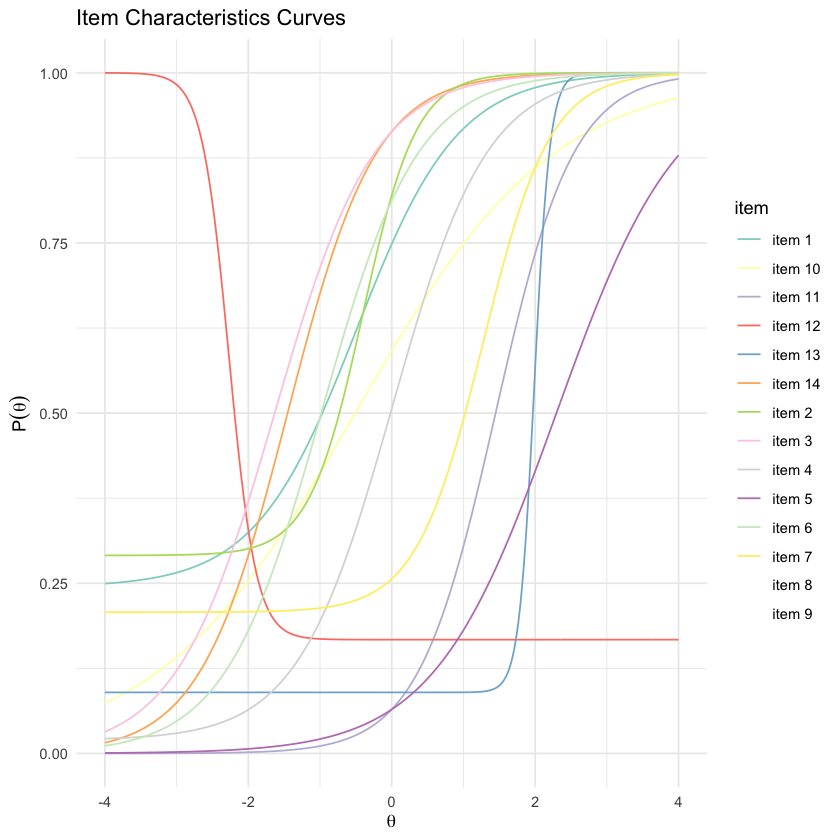

In [77]:
tracePlot(mirt_3pl, facet = F, legend = T) + scale_color_brewer(palette = "Set3")

Se desideriamo confrontare le ICC di soltanto alcuni item:

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


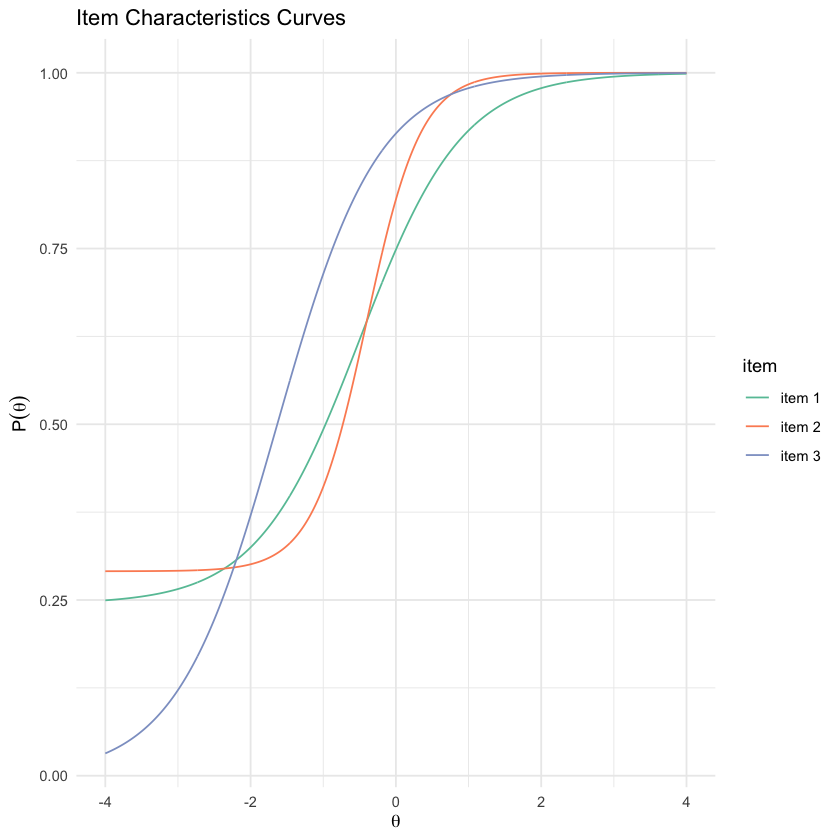

In [78]:
tracePlot(mirt_3pl, items = c(1:3), facet = F, legend = T) + scale_color_brewer(palette = "Set2")

Le curve caratteristiche degli item (ICC) forniscono una rappresentazione visiva di come ciascun item si comporta a vari livelli di abilità latente. Queste curve sono particolarmente utili per comprendere due aspetti fondamentali degli item di un test:

1. **Discriminazione**: Questo parametro riflette la capacità di un item di distinguere tra individui che hanno diverse abilità. Un item con alta discriminazione sarà capace di differenziare efficacemente tra chi ha abilità elevate e chi ha abilità basse. Questo attributo si manifesta nella pendenza della curva caratteristica: una pendenza più accentuata indica una maggiore discriminazione, poiché piccole variazioni nell'abilità dei partecipanti producono grandi cambiamenti nella probabilità di fornire una risposta corretta.

2. **Difficoltà**: La difficoltà di un item indica il punto nel continuum di abilità latente in cui un partecipante ha una probabilità del 50% di rispondere correttamente. In pratica, è il livello di abilità corrispondente al punto in cui la curva incrocia il 50% sulla scala di probabilità di risposta corretta. Gli item meno difficili necessitano di un livello inferiore di abilità per una risposta corretta, mentre quelli più difficili richiedono un livello superiore.

La preferenza per item con curve caratteristiche simili o diverse dipende dagli obiettivi dell'analisi. In alcuni contesti, avere item con curve simili può facilitare l'interpretazione e la comparazione dei risultati. D'altro canto, item con curve diverse sono vantaggiosi per valutare un'ampia gamma di abilità e per garantire una valutazione completa e accurata dell'intervallo di competenze dei partecipanti. La scelta ottimale dipende dalle esigenze specifiche della ricerca e dagli obiettivi prefissati per l'analisi.

Si noti che possiamo anche valutare graficamente in che misura le ICC teoriche corrispondano alle ICC empiriche.

### Test Grafico e Test del Rapporto di Verosimiglianza

Il test grafico del modello, basato sui principi di Rasch (1960), offre un approccio intuitivo per valutare l'invarianza degli item in un test, confrontando i parametri degli item stimati per due gruppi di persone. Affinché il modello di Rasch sia considerato valido, è necessario che le stime dei parametri degli item per i diversi gruppi concordino, fino a una trasformazione lineare. In termini pratici, ciò si traduce nel fatto che, quando visualizzate in un grafico, le stime dei parametri degli item dei due gruppi dovrebbero allinearsi lungo una linea retta.

Per integrare questa analisi, possiamo utilizzare il test del rapporto di verosimiglianza di Andersen (1973), un approccio consolidato per verificare l'adeguatezza del modello di Rasch nel rappresentare il comportamento dei partecipanti ai test. Il test di Andersen valuta se le stime dei parametri degli item rimangono consistenti tra diversi gruppi di partecipanti. Se i parametri degli item stimati individualmente per ciascun gruppo differiscono significativamente, ciò indica che il modello di Rasch potrebbe non essere un'adeguata rappresentazione del comportamento osservato nei test.

A differenza del test grafico, il test del rapporto di verosimiglianza confronta il massimo della verosimiglianza condizionata sotto il modello di Rasch con il massimo della verosimiglianza condizionata quando i parametri degli item possono variare tra i gruppi. Questa metodologia fornisce un'indicazione di quanto efficacemente ciascun modello rappresenti il comportamento dei partecipanti.

Il test del rapporto di verosimiglianza utilizza la statistica di test $T = −2 \cdot log(LR)$, che ha una distribuzione approssimativamente $\chi^2$ per campioni grandi. Valori del rapporto di verosimiglianza inferiori a 1, o valori elevati di $T$, suggeriscono una violazione del modello di Rasch.

Il test di Andersen è implementato nel pacchetto `eRm` in `R`. Tuttavia, è importante notare che un risultato non significativo in questo test non può essere interpretato automaticamente come supporto per il modello di Rasch, specialmente se il modello più generale non descrive adeguatamente i dati. Inoltre, la capacità di rilevare differenze tra i gruppi specificati dipende dall'effettiva diversità dei parametri del modello tra questi gruppi. Sono stati sviluppati approcci più flessibili per rilevare le differenze nei parametri.

Esamineremo questo test applicando il modello di Rasch ai dati in discussione. Consideriamo innanzitutto una suddivisione del campione viene in base alla media dei punteggi grezzi ottenuti dai rispondenti nel test.

In [43]:
rm_sum0 <- eRm::RM(responses)

In [44]:
lrt_mean_split <- LRtest(rm_sum0, splitcr = "mean")
lrt_mean_split


Andersen LR-test: 
LR-value: 79.71 
Chi-square df: 13 
p-value:  0 


L'output di questo test mostra una violazione significativa del modello di Rasch al livello $\alpha$ = 0.05. 

Ora possiamo visualizzare le stime delle difficoltà per ciascun gruppo utilizzando la funzione `plotGOF()` per creare il test grafico. Questa funzione prende come input il risultato ottenuto da `LRtest()` e disegna le stime dei parametri degli item per i due gruppi.

Per creare il grafico relativo al test grafico basato sulla divisione media, seguiamo questo procedimento: ogni piccolo cerchio nella figura rappresenta la stima della difficoltà di un singolo item. La coordinata x di un cerchio indica la stima di difficoltà per i partecipanti al test con punteggi inferiori alla media, mentre la coordinata y indica la stima di difficoltà per quelli con punteggi superiori alla media. La linea y = x viene fornita come riferimento: i punti che giacciono su questa linea hanno la stessa stima in entrambi i gruppi. La distanza tra un punto e la linea di riferimento indica quanto le stime differiscano tra i due gruppi, indicandone anche la direzione. Gli item al di sotto della linea sono considerati più difficili per i partecipanti con punteggi sotto la media, mentre quelli al di sopra sono considerati più difficili per quelli con punteggi sopra la media.

Gli assi orizzontali e verticali mostrano gli intervalli di confidenza per le stime di ciascun gruppo di partecipanti al test. La larghezza di ciascun intervallo di confidenza è determinata dall'elemento gamma della lista fornita a `conf`. L'impostazione predefinita `gamma = .95` produce intervalli di confidenza al 95% per ciascun asse dell'ellisse. Quando un'ellisse di confidenza non interseca la linea di riferimento, l'item corrispondente viene diagnosticato come mostrante un significativo DIF (Differential Item Functioning).

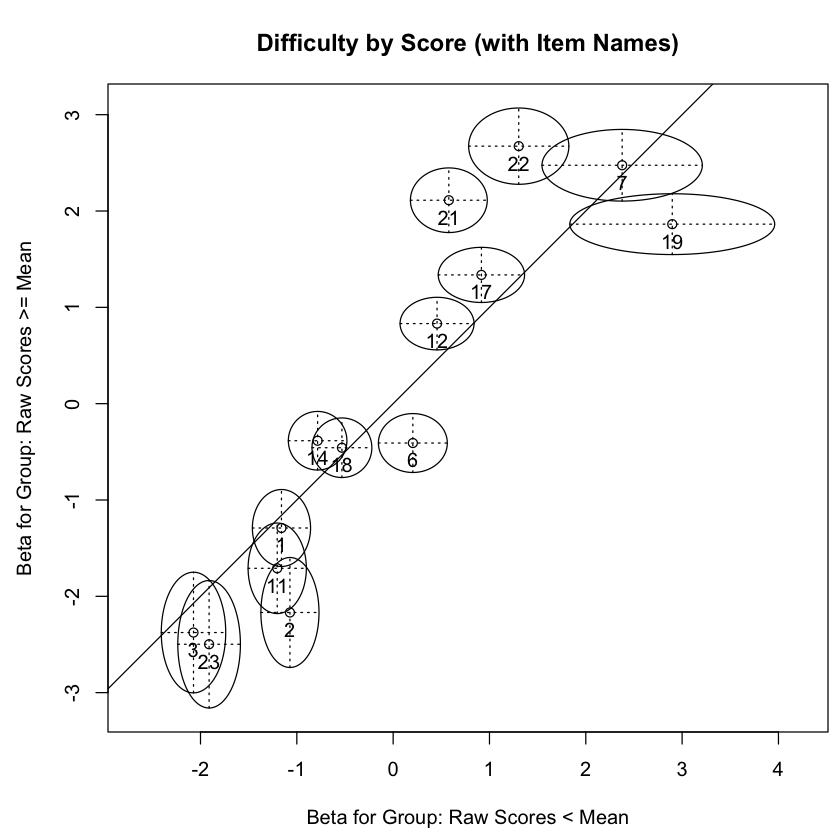

In [48]:
plotGOF(
    lrt_mean_split,
    tlab = "item", pos = 1,
    main = "Difficulty by Score (with Item Names)",
    conf = list(gamma = 0.95, col = 1)
)

La figura evidenzia che gli item 2, 6, 21 e 22 mostrano significative differenze tra i rispondenti con punteggi superiori e inferiori alla media, poiché le loro ellissi di confidenza non intersecano la linea di riferimento. Gli item 21 e 22 risultano più difficili per i rispondenti con punteggi pari o superiori alla media, mentre gli item 2 e 6 risultano più difficili per coloro con punteggi inferiori alla media. Tali deviazioni dal modello possono verificarsi quando le Curve Caratteristiche degli Item (ICC) osservate differiscono da quelle attese sotto il modello di Rasch per i partecipanti al test con abilità basse e alte. Ciò può essere causato, ad esempio, dalla presenza di indovinelli (guessing) o da una pendenza delle curve più ripida o meno ripida di quanto previsto dal modello di Rasch.

È anche possibile specificare una variabile per l'argomento `splitcr`, che permette di suddividere i partecipanti al test in gruppi specifici. Ad esempio, è possibile testare se i parametri degli item variano in base al genere, passando un vettore contenente l'appartenenza ai gruppi come argomento `splitcr`.

In [49]:
lrt_gender <- LRtest(rm_sum0, splitcr = gender)
lrt_gender


Andersen LR-test: 
LR-value: 32.973 
Chi-square df: 13 
p-value:  0.002 


Come nel test precedente, anche il Test del Rapporto di Verosimiglianza (LRT) per il genere indica una violazione significativa del modello di Rasch al livello α = 0.05.

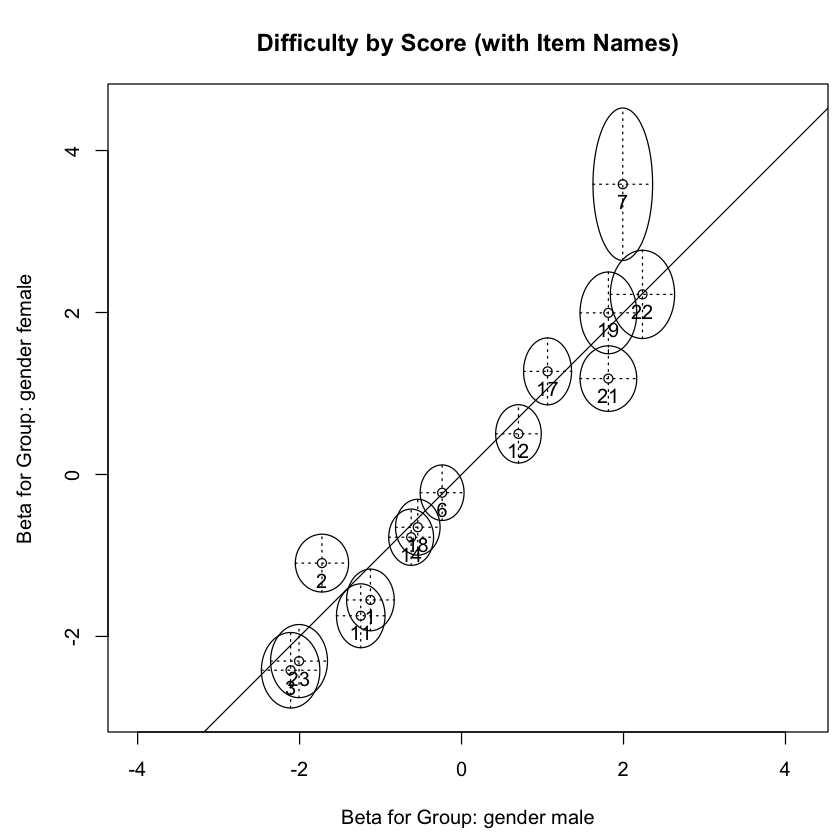

In [50]:
plotGOF(
    lrt_gender,
    tlab = "item", pos = 1,
    main = "Difficulty by Score (with Item Names)",
    conf = list(gamma = 0.95, col = 1)
)

La figura indica che gli item 2, 7 e 21 differiscono tra partecipanti al test femminili e maschili. Gli item 2 e 7 sono più difficili per i partecipanti femminili, mentre l'item 21 è più difficile per i partecipanti maschili.

### Test di Wald

Continuiamo con il test del modello di Rasch. Le impostazioni del test del rapporto di verosimiglianza di Andersen (1973) e del test di Wald sono molto simili. Entrambi i test si basano sull'idea che il modello di Rasch sia un modello ragionevole per i dati dei test solo se i parametri degli item stimati non variano sistematicamente tra gruppi di persone. In entrambi i test, consideriamo le stime dei parametri degli item per ciascun gruppo di persone. A differenza del test del rapporto di verosimiglianza, tuttavia, il test di Wald confronta direttamente le stime dei parametri degli item dei gruppi. In sostanza, il test di Wald calcola la differenza tra la stima del primo gruppo della difficoltà dell'item i, β̂(1)i, e quella del secondo gruppo, β̂(2)i. Questa differenza viene divisa per il suo errore standard per tenere conto del fatto che tutte le stime sono soggette a rumore. Questo porta alla statistica di test per l'item i:

$$ 
T_i = \frac{\hat{\beta}^{(1)}_i - \hat{\beta}^{(2)}_i}{\sqrt{se(\hat{\beta}^{(1)}_i)^2 + se(\hat{\beta}^{(2)}_i)^2}}, 
$$

dove $ se(\hat{\beta}^{(1)}_i) $ e $ se(\hat{\beta}^{(2)}_i) $ indicano rispettivamente gli errori standard di $ \hat{\beta}^{(1)}_i $ e $ \hat{\beta}^{(2)}_i $.

Per campioni di grandi dimensioni, $ T_i $ approssimativamente segue una distribuzione normale standard sotto l'ipotesi nulla che il vero parametro dell'item sia lo stesso per entrambi i gruppi. Valori estremi di $ T_i $ sono improbabili sotto la distribuzione normale. Quindi, un valore estremo di $ T_i $, con un piccolo valore p, indica che l'item i viola il modello di Rasch.

Eseguiamo il test di Wald con `R`:

In [51]:
Waldtest(rm_sum0, splitcr = "mean")


Wald test on item level (z-values):

         z-statistic p-value
beta I1       -0.514   0.607
beta I2       -3.328   0.001
beta I3       -0.838   0.402
beta I6       -2.555   0.011
beta I7        0.210   0.834
beta I11      -1.773   0.076
beta I12       1.562   0.118
beta I14       1.821   0.069
beta I17       1.550   0.121
beta I18       0.333   0.739
beta I19      -1.827   0.068
beta I21       5.768   0.000
beta I22       4.106   0.000
beta I23      -1.560   0.119


Questi test indicano nuovamente che gli item 2, 6, 21 e 22 differiscono sostanzialmente tra i partecipanti al test con punteggi sopra e sotto la media.

Possiamo anche eseguire il test per la differenza tra maschi e femmine:

In [52]:
Waldtest(rm_sum0, splitcr = gender)


Wald test on item level (z-values):

         z-statistic p-value
beta I1       -1.727   0.084
beta I2        2.543   0.011
beta I3       -1.020   0.308
beta I6        0.067   0.946
beta I7        3.089   0.002
beta I11      -1.978   0.048
beta I12      -0.861   0.389
beta I14      -0.673   0.501
beta I17       0.815   0.415
beta I18      -0.493   0.622
beta I19       0.583   0.560
beta I21      -2.305   0.021
beta I22      -0.030   0.976
beta I23      -1.019   0.308


I risultati qui concordano in gran parte anche con la figura precedente. In linea con il test grafico, il test di Wald indica che gli item 2, 7 e 21 differiscono tra i gruppi.

Un approccio simile può anche essere usato per il modelli 2PL e 3PL.

## Rimozione di Item

Se questa analisi fosse parte del processo di sviluppo di un test reale, sarebbe essenziale esaminare attentamente gli item che mostrano Differential Item Functioning (DIF) o altre anomalie nelle analisi successive. Gli esperti di contenuto dovrebbero prendere in considerazione se modificare o rimuovere tali item dal test. Tuttavia, nella discussione seguente, non effettueremo la rimozione degli item poiché desideriamo mantenere il set di dati completo. Tuttavia, nel caso in cui si desiderasse rimuovere alcuni item (cioè colonne) dal set di dati, ciò potrebbe essere realizzato utilizzando i seguenti comandi.

In [58]:
responses_removeDIFitems <- responses[, -which(colnames(responses) %in% c("I2", "I7"))]
colnames(responses_removeDIFitems)

[1] "I1"  "I3"  "I6"  "I11" "I12" "I14" "I17" "I18" "I19" "I21" "I22" "I23"

Dopo aver rimosso degli item, l'intero processo dovrebbe ricominciare da capo, rifacendo il modello di Rasch e indagando sugli item rimanenti. 

### Test di Martin-Löf

Nella sezione precedente, abbiamo esaminato il test del rapporto di verosimiglianza di Andersen (1973), il quale verifica se i parametri degli item rimangono invarianti tra vari gruppi di individui. Una questione correlata riguarda l'invarianza dei parametri degli individui tra diversi gruppi di item.

La domanda chiave qui è se diversi gruppi di item misurino tratti latenti distinti. Questo rappresenterebbe una violazione del modello di Rasch, che implica un unico tratto latente sottostante a tutti gli item. Se tale violazione del modello viene identificata, potrebbe essere più appropriato considerare un modello IRT multidimensionale.

Un metodo comune per valutare la dimensionalità in generale è l'analisi fattoriale esplorativa. Tuttavia, qui descriveremo il test di Martin-Löf, disponibile nel pacchetto `eRm`, che si concentra sull'ipotesi alternativa secondo cui gruppi di item misurano tratti latenti diversi. Come il test del rapporto di verosimiglianza di Andersen, il test di Martin-Löf si basa sul confronto di due verosimiglianze condizionate.

La prima verosimiglianza condizionata, Lu(r,β), corrisponde al modello di Rasch. La seconda verosimiglianza condizionata, Lu(r1, r2, β), rappresenta un modello più generale che consente parametri degli individui diversi per specifici gruppi di item. Prima dell'analisi, è necessario definire i gruppi di item, che possono essere identificati in base alle loro difficoltà o a diverse dimensioni latenti sospettate di essere misurate.

Se la seconda verosimiglianza è maggiore, ciò indica una violazione del modello di Rasch, analogamente al test del rapporto di verosimiglianza di Andersen. Il test di Martin-Löf è spesso considerato un test per la unidimensionalità, ma certi tipi di multidimensionalità possono manifestarsi anche come Differential Item Functioning (DIF). Pertanto, i test che mirano a rilevare il DIF possono essere sensibili anche a certe violazioni della unidimensionalità.

In [59]:
mloef_median <- MLoef(rm_sum0, splitcr = "median")
mloef_median


Martin-Loef-Test (split criterion: median)
LR-value: 67.083 
Chi-square df: 48 
p-value: 0.036 


Otteniamo un valore p inferiore a 0.05. Ciò indica che le stime dei parametri delle persone ottenute dagli item facili e difficili differiscono in modo significativo, ovvero, una violazione del modello di Rasch.

## Item e Person Fit

### Tests e Statistiche di Bontà di Adattamento

In questa sezione esaminiamo una varietà di metodi per valutare l'adattamento dei dati di risposta agli item e al modello di Rasch. Alcuni di questi metodi sono test statistici formali, mentre altri sono statistiche descrittive per le quali sono stati suggeriti nella letteratura dei limiti critici empirici. Vedremo anche che esistono approcci per valutare l'adattamento a livello dell'intero test psicologico, così come approcci focalizzati sulla valutazione dell'adattamento di singoli item o individui.

### Statistica M2

I confronti precedenti indicano che il modello 3PL (Three Parameter Logistic) rappresenta i dati in modo più efficace rispetto ai modelli Rasch e 2PL (Two Parameter Logistic). Tuttavia, è importante notare che, sebbene il 3PL sia emerso come il migliore tra i modelli testati, questo non garantisce necessariamente che il modello sia un buon adattamento in assoluto ai dati. Per valutare la bontà di adattamento del modello 3PL, possiamo utilizzare la statistica M2.

Sviluppata da Maydeu-Olivares e Joe (2006), la statistica M2 è particolarmente utile quando si lavora con modelli IRT più complessi, come il modello logistico a tre parametri (3PL), che include parametri per la difficoltà, la discriminazione e l'indovinamento degli item. La statistica M2 fornisce un modo per testare se le discrepanze tra le frequenze osservate nei dati e quelle previste dal modello sono significativamente grandi da suggerire un'inadeguatezza del modello.

La statistica M2 è basata sui residui, ossia le differenze tra le osservazioni effettive e le previsioni del modello. Questi residui vengono poi analizzati per vedere se sono distribuiti in modo casuale, come ci si aspetterebbe se il modello fosse un buon adattamento, o se mostrano qualche pattern sistematico che indica una cattiva adattabilità. I gradi di libertà per il test M2 dipendono dal numero di parametri stimati nel modello e dalla struttura dei dati.

L'ipotesi nulla in questo contesto afferma che le discrepanze tra le frequenze osservate e quelle previste dal modello 3PL (le somme per righe e colonne dei residui) sono solamente fluttuazioni casuali. Un valore p alto (ad esempio, maggiore di 0.05) indica che non ci sono prove sufficienti per rifiutare l'ipotesi nulla, suggerendo che il modello può essere considerato adeguato. Un valore p basso, al contrario, indica che il modello non si adatta bene ai dati e che le discrepanze osservate sono improbabili da attribuire solo al caso.

La funzione `M2()` nel pacchetto `mirt` consente di calcolare questa statistica. L'output della funzione `M2()` include tre colonne principali: il valore della statistica M2, i gradi di libertà associati (df), e il valore p che corrisponde alla probabilità di ottenere un risultato altrettanto estremo o più estremo del valore osservato della statistica M2, assumendo che l'ipotesi nulla sia vera. 

### Errore Quadratico Medio di Approssimazione (RMSEA)

Il RMSEA deriva dalla statistica M2. Utilizza i gradi di libertà (nuovamente $ k - d $) e la dimensione del campione $ P $ per calcolare il valore RMSEA. La formula per il RMSEA è:

$$ \text{RMSEA} = \sqrt{\frac{M2 - df}{P \cdot df}} $$

Valori di RMSEA vicini a 0 generalmente indicano un buon adattamento del modello ai dati. Sebbene non esistano linee guida universalmente accettate per interpretare il RMSEA, un valore intorno a 0,05 è spesso considerato indicativo di un buon adattamento del modello.

### Residuo Quadratico Medio Standardizzato (SRMSR)

SRMSR è un'altra statistica di adattamento complessivo che confronta le correlazioni o le covarianze osservate tra tutte le coppie di item con quelle previste sotto il modello di Rasch (o un altro modello della teoria della risposta agli item). Valori vicini a 0 suggeriscono un buon adattamento del modello. Maydeu-Olivares (2013) raccomanda l'uso di un valore di soglia di 0.05 per SRMSR, simile al RMSEA.

La funzione `M2()` nel pacchetto `mirt` consente di calcolare questa statistica. L'output della funzione `M2()` include tre colonne principali: il valore della statistica M2, i gradi di libertà associati (df), e il valore p che corrisponde alla probabilità di ottenere un risultato altrettanto estremo o più estremo del valore osservato della statistica M2, assumendo che l'ipotesi nulla sia vera. 

Calcoliamo M2 per il modello di Rasch:

In [62]:
M2(mirt_rm)

,M2,df,p,RMSEA,RMSEA_5,RMSEA_95,SRMSR,TLI,CFI
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stats,277.5505,90,0,0.0722689,0.06261658,0.08191791,0.09413757,0.7494602,0.7522134


La statistica M2 è alta e significativa, indicando che ci sono differenze preoccupanti tra il modello e i dati. Oltre alla statistica M2, la funzione `M2()` stampa anche l'errore quadratico medio di approssimazione (RMSEA, insieme a un intervallo di confidenza del 90%) e il residuo quadratico medio standardizzato (SRMR), così come altri due indici di adattamento basati sulla statistica del test χ2. 

La statistica più comunemente riportata tra queste è il RMSEA. Un modello è considerato di fornire una buona rappresentazione dei dati del test quando il limite superiore dell'intervallo di confidenza è inferiore a 0.05. In questo caso, il limite superiore è circa 0.039, suggerendo che il modello fornisce una buona rappresentazione dei dati. Nel caso presente, il valore RMSEA è troppo alto e i valori CFI e TLI sono troppo lontani da 1.

Calcoliamo ora M2 per il modello 3PL:

In [60]:
M2(mirt_3pl)

,M2,df,p,RMSEA,RMSEA_5,RMSEA_95,SRMSR,TLI,CFI
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stats,76.06463,63,0.1249838,0.02279774,0,0.03943958,0.04533455,0.975068,0.9827394


Un valore p superiore al 5% (p > 0.05) indica che non abbiamo evidenze sufficienti per rifiutare l'ipotesi nulla, suggerendo così che il modello 3PL può essere considerato un adattamento ragionevole ai dati osservati. Il buon adattamento del modello 3PL ai dati è anche confermato dalle statistiche  RMSEA, CFI e TLI.

### Valutare l'Adattamento degli Item

Nell'IRT, non ci concentriamo solamente sull'adattamento complessivo del modello ai dati, ma esaminiamo anche gli indici di adattamento relativi a item e rispondenti. L'IRT ci consente di valutare quanto bene ogni item si adatti al modello e se i pattern di risposta individuali siano allineati con il modello.

Iniziamo con l'addattamento degli item. Sono stati proposti diversi indici per valutare l'adattamento degli item e possiamo utilizzare la funzione `itemfit()` per ottenere una varietà di questi indici. Di default, riceviamo l'S_X2 di Orlando e Thissen (2000) con i corrispondenti gradi di libertà (dfs), RMSEA e valori p. Questo test dovrebbe risultare non significativo per indicare un buon adattamento dell'item. Come vediamo qui sotto, nel caso del modello di Rasch, diversi item mostra un cattivo adattamento. 

In [64]:
itemfit(mirt_rm)

item,S_X2,df.S_X2,RMSEA.S_X2,p.S_X2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
I1,4.149893,7,0.00000000,7.623599e-01
I2,19.333566,7,0.06645212,7.204188e-03
I3,5.527890,7,0.00000000,5.958220e-01
I6,14.085952,8,0.04366493,7.955244e-02
I7,8.976726,7,0.02660344,2.543313e-01
I11,23.364314,7,0.07654440,1.472551e-03
I12,17.673493,7,0.06181841,1.353327e-02
I14,9.789665,7,0.03160389,2.008096e-01
I17,35.134304,7,0.10036508,1.055277e-05


Nel caso del modello 3PL, invece, solo 2 item mostrano potenzialmente una mancanza di adattamento.

In [65]:
itemfit(mirt_3pl)

item,S_X2,df.S_X2,RMSEA.S_X2,p.S_X2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
I1,4.731821,6,0.00000000,0.578640034
I2,9.894002,5,0.04952912,0.078294980
I3,5.327854,6,0.00000000,0.502502014
I6,9.774113,5,0.04891870,0.081894594
I7,10.211378,5,0.05110988,0.069462758
I11,20.066795,5,0.08690384,0.001214169
I12,8.405740,7,0.02243453,0.298178453
I14,10.646909,7,0.03613491,0.154779402
I17,8.728276,6,0.03375842,0.189446130


### Statistiche di Infit e Outfit

Nella sezione precedente abbiamo discusso i test χ2 e M2, basati sul confronto tra le frequenze osservate e quelle attese secondo il modello di Rasch. Le statistiche di adattamento presentate di seguito si basano su un approccio simile, utilizzando i residui di Rasch. Questi sono le differenze tra le risposte osservate (vale a dire, le risposte 0 o 1 per gli item dicotomici) e i loro valori attesi (cioè, le probabilità predette di una risposta corretta secondo il modello di Rasch). Tipicamente, questi valori attesi vengono calcolati in base alle stime dei parametri degli item e delle persone.

Generalmente, quando c'è un buon adattamento tra i dati e il modello, si può prevedere che i residui siano piccoli. Pertanto, è naturale che i residui di Rasch possano essere utilizzati per valutare l'adattamento del modello di Rasch. Vedremo che nell'analisi di Rasch non solo i casi in cui i residui sono più grandi del previsto possono essere motivo di preoccupazione, ma anche quelli in cui i residui sono più piccoli del previsto.

Un approccio comune per verificare l'adattamento di singoli item usando i residui di Rasch consiste nel calcolare le statistiche di infit e outfit. Descriveremo i passaggi per calcolare queste statistiche prima di affrontarne l'interpretazione. Ci concentreremo sul caso in cui queste statistiche vengono calcolate per singoli item. 

#### Outfit

La funzione primaria della statistica di outfit è quantificare quanto le risposte dei partecipanti si discostino dalle aspettative modellistiche. 

- Si inizia calcolando, per ciascun partecipante e per ogni item del test, il residuo, definito come la differenza tra la risposta osservata di un individuo a un determinato item e la risposta che il modello IRT prevede per quel partecipante e quell'item. La risposta attesa è stimata sulla base della probabilità che il modello attribuisce alla correttezza della risposta.

- Successivamente, i residui vengono standardizzati secondo la formula:

   $$
   Z_{si} = \frac{X_{si} - E(X_{si})}{\sqrt{Var(X_{si})}},
   $$

   dove $Z_{si}$ rappresenta lo z-score del residuo per il partecipante $s$ all'item $i$, $X_{si}$ è la risposta osservata, $E(X_{si})$ è la risposta attesa (basata sulla probabilità di correttezza prevista dal modello di Rasch), e $Var(X_{si})$ è la varianza della risposta attesa.

- Per calcolare l'outfit mean square (MSQ) per un item specifico, si procede nel modo seguente:
   - Si elevano al quadrato gli z-score standardizzati di ciascun partecipante per l'item considerato.
   - Si sommano tutti i quadrati ottenuti.
   - Si divide la somma per il numero totale di partecipanti.
   
   La formula per l'outfit MSQ per l'item $i$ è quindi:

   $$
   \text{Outfit MSQ}_i = \frac{\sum_{p=1}^{P} Z_{pi}^2}{P}.
   $$

Questa procedura misura l'adattamento delle risposte degli individui all'item, rispetto alle previsioni del modello di Rasch. Un MSQ significativamente elevato o ridotto indica discrepanze tra le risposte osservate e quelle previste, suggerendo la necessità di ulteriori analisi o revisioni del modello o degli item del test.

Sotto il modello di Rasch, il valore atteso di questa statistica è 1. Valori superiori indicano residui maggiori rispetto alle previsioni del modello, segnalando un underfit. Al contrario, valori inferiori a 1 indicano un overfit, ossia una deviazione inferiore al previsto tra i valori attesi e i dati empirici.

Per ciascun item, si può anche calcolare una statistica di mean square pesata e standardizzata, generalmente indicata con ti. Definendo $\sqrt[3]{\text{MSQ}_i}$ e sd(MSQ_i) come il cubo radice e la deviazione standard di Outfit MSQ_i, rispettivamente, la statistica standardizzata ti è espressa da:

$$ 
\text{Outfit ti} = \left( \sqrt[3]{\text{MSQ}_i} - 1 \right) \left( \frac{3}{\text{sd(MSQ}_i)} \right) + \left( \frac{\text{sd(MSQ}_i)}{3} \right).
$$

Questa statistica è spesso inclusa nei risultati dei software di analisi, insieme all'MSQ.

Item con underfit e overfit possono essere identificati anche osservando le loro curve caratteristiche di risposta empiriche (ICC). Gli item con underfit presentano ICC più piatte del previsto dal modello di Rasch, mentre quelli con overfit hanno ICC più ripide.

#### Infit

L'indice di infit differisci dall'outfit, il quale è più influenzato da risposte estreme o outlier. L'infit è particolarmente sensibile alle risposte che si discostano in maniera più sottile dal pattern generale previsto dal modello. Si calcola come una media ponderata dei residui standardizzati, attribuendo pesi inversamente proporzionali alla varianza degli item. Questa proprietà rende l'infit un ottimo strumento per individuare problemi di adattamento del modello che riguardano la consistenza interna delle risposte.

La statistica di infit MSQ, simile a quella di outfit, mira a valutare quanto bene le risposte individuali si conformino alle aspettative del modello. Tuttavia, si distingue dall'outfit nella gestione dei residui.

Nel calcolo dell'infit, i residui delle risposte individuali vengono ponderati in funzione della loro varianza prevista dal modello di Rasch. Ciò implica che i residui con varianze minori, tipicamente risultanti da una marcata discrepanza tra le abilità dei rispondenti e la difficoltà degli item, influenzano meno la statistica di infit rispetto a quelli con varianze maggiori.

Questo metodo di ponderazione rende l'infit meno sensibile agli outlier rispetto all'outfit. In altre parole, mentre l'outfit risente in modo più uniforme di tutte le deviazioni dalle aspettative modellistiche, l'infit attribuisce maggior peso a quelle deviazioni che sono meno estreme o più prevedibili data la struttura del modello.

La formula per il calcolo dell'Infit MSQ per un dato item $ i $ è:

$$
\text{Infit MSQ}_i = \frac{\sum_{p=1}^{P} W_{pi} Z_{pi}^2}{\sum_{p=1}^{P} W_{pi}},
$$

dove:
- $ Z_{pi} $ rappresenta il residuo di Rasch standardizzato per il rispondente $ p $ all'item $ i $.
- $ W_{pi} $ è la varianza attesa del residuo $ Z_{pi} $ secondo il modello di Rasch.
- $ P $ è il numero totale dei rispondenti.

Similmente all'outfit, è possibile calcolare anche una versione standardizzata dell'Infit MSQ per ogni item, conosciuta come statistica Infit $ t $. Questa versione standardizzata facilita il confronto dell'adattamento degli item tra diverse situazioni o diversi test, normalizzando i valori su una scala comune.

In conclusione, l'Infit MSQ fornisce un metodo ponderato per valutare l'adattamento delle risposte ai singoli item in un test basato sul modello di Rasch, considerando la varianza attesa delle risposte e rendendolo particolarmente adeguato per identificare deviazioni dalle aspettative del modello che sono meno estreme o più coerenti con la struttura teorica del modello stesso.

#### Soglie

Per entrambi i valori MSQ e t delle statistiche di infit e outfit, sono stati proposti vari valori di soglia. Bond e Fox (2007) e Engelhard (2013) menzionano valori di soglia di -2 e 2 per le statistiche t, mentre Paek e Cole (2020) suggeriscono -3 e 3. Analogamente, Bond e Fox (2007) danno 0.75 e 1.3 come valori di soglia per le statistiche MSQ, mentre DeMars (2010) menziona 0.6 e 1.5 come possibili alternative. Desjardins e Bulut (2018), d'altra parte, si oppongono all'uso di valori di soglia specifici per queste statistiche.

Per calcolare gli indici di infit e outfit usiamo nuovamente la funzione `itemfit()` del pacchetto `mirt`. Iniziamo con il modello di Rasch:

In [70]:
mirt::itemfit(mirt_rm, fit_stats = "infit", method = "ML")

item,outfit,z.outfit,infit,z.infit
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
I1,0.8138091,-1.68334189,0.9044759,-1.6647753
I2,0.6845674,-2.79308715,0.8088811,-3.2706129
I3,0.7240040,-1.50990166,0.8700715,-1.4928072
I6,0.8343214,-2.27167027,0.8601240,-3.2582397
I7,0.6824297,-1.35748185,0.8313778,-1.5036967
I11,0.8317490,-1.38101079,0.8158106,-3.1426850
I12,1.1478287,1.48400995,0.9712695,-0.5543699
I14,0.9902636,-0.08597728,1.0231872,0.4939914
I17,1.3153478,2.27622298,0.9351173,-1.0397905


La tabella risultante inizia con le statistiche del test di adattamento χ2 approssimativo, i suoi gradi di libertà e i valori di p risultanti. Se il modello di Rasch è valido, la statistica di test risultante può essere approssimativamente descritta da una distribuzione χ2, il che porta ai valori di p presentati.

Le colonne seguenti presentano le statistiche MSQ e t di infit e outfit. Per le statistiche MSQ di infit e outfit, valori vicini a 1 indicano un buon adattamento del modello, mentre per le statistiche t di infit e outfit, valori vicini a 0 indicano un buon adattamento. Valori più alti indicano che le risposte sono più casuali di quanto previsto dal modello di Rasch, segnalando un sottoadattamento (underfit); valori più bassi indicano che le risposte sono meno casuali del previsto, segnalando un sovradattamento (overfit).

Seguendo una delle linee guida proposte, esamineremo ulteriormente quegli item i cui valori t di infit o outfit sono inferiori a -2 o superiori a 2 (ma esistono linee guida alternative). Troviamo che per gli item 2, 6, 11 e 19, almeno un valore t è inferiore a -2, indicando un sovradattamento. Per l'item 19 ciò è supportato dal fatto che la ICC empirica ha una pendenza più ripida rispetto alla ICC attesa.

Per gli item 17, 21 e 22, invece, almeno un valore t per le statistiche di infit e outfit è superiore a 2, indicando un sottoadattamento. Questo è nuovamente in linea con l'esame delle ICC, dove abbiamo riscontrato che la ICC empirica per l'item 21 ha una pendenza inferiore rispetto alla ICC attesa.

La situazione migliora sostanzialmente nel caso del modello 3PL:

In [128]:
mirt::itemfit(mirt_3pl, fit_stats = "infit", method = "ML")

Warning message:
“The following factor score estimates failed to converge successfully:
    127,128,169,180,189,233,263,298”


item,outfit,z.outfit,infit,z.infit
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
I1,1.0053224,0.08416828,0.9828264,-0.2734579
I2,0.8650919,-0.36666653,0.8733259,-2.0161598
I3,0.8763686,-0.40387987,0.9089194,-0.9403723
I6,0.9807241,-0.14508360,0.9155032,-1.5032687
I7,0.7829731,-0.79735536,0.8957264,-0.8992810
I11,1.4621993,2.38316000,0.8855767,-1.5671665
I12,0.9450892,-0.92931105,0.9415297,-1.1574013
I14,0.9674548,-0.56489988,1.0089689,0.2225748
I17,0.7836005,-2.45664324,0.8073054,-2.7086428


### Valutare l'Adattamento delle Persone

Possiamo generare le stesse misure di adattamento per ogni persona per valutare quanto bene i pattern di risposta di ciascuno si allineano con il modello. Ragioniamo in questo modo: se una persona con un alto valore di $\theta$ (cioè alta abilità latente) non risponde correttamente a un item facile, questa persona non si adatta bene al modello. Al contrario, se una persona con bassa abilità risponde correttamente a una domanda molto difficile, anche questo non è conforme al modello. Nella pratica, è probabile che ci saranno alcune persone che non si adattano bene al modello. Tuttavia, finché il numero di rispondenti non conformi è basso, la situazione è accettabile. Di solito, ci concentriamo nuovamente sulle statistiche di infit e outfit. Se meno del 5% dei rispondenti presenta valori di infit e outfit superiori o inferiori a 1.96 e -1.96, possiamo considerare il modello adeguato.

In [72]:
head(personfit(mirt_3pl))

,outfit,z.outfit,infit,z.infit,Zh
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0037507,0.2058193,1.1402420,0.5097167,-0.2992923
2,0.5362050,-0.5420783,0.7275664,-0.9545017,0.9461350
3,0.4905571,-0.5515534,0.6610119,-1.2948093,1.1533568
4,1.2358455,0.5711643,1.2313527,0.7148374,-0.5851039
5,0.2257935,-1.4865761,0.3046936,-2.0910394,1.4766065
6,0.9803662,0.2884448,1.1518642,0.6236674,-0.4200363


In [73]:
personfit(mirt_3pl) %>%
    summarize(
        infit.outside = prop.table(table(z.infit > 1.96 | z.infit < -1.96)),
        outfit.outside = prop.table(table(z.outfit > 1.96 | z.outfit < -1.96))
    ) # lower row = non-fitting people

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”


infit.outside,outfit.outside
<table[1d]>,<table[1d]>
0.9475,0.9875
0.0525,0.0125


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


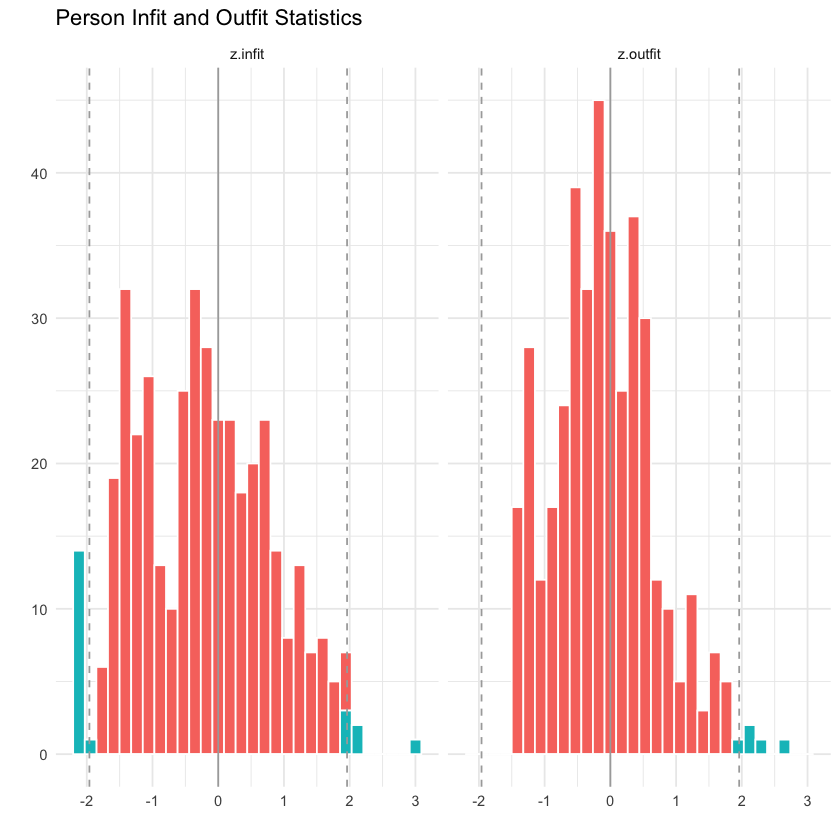

In [74]:
personfitPlot(mirt_3pl)

Come per le statistiche di infit e outfit per i singoli item, individui con valori di t superiori a 2 mostrano un comportamento di risposta più casuale rispetto a quanto previsto dal modello di Rasch. Questo può indicare, ad esempio, comportamenti di risposta basati su supposizioni o scarsa attenzione. I modelli di risposta che portano a valori di t inferiori a -2 indicano un comportamento di risposta più deterministico rispetto a quello atteso. 

Il fit dei rispondenti peggiora se consideriamo il modello di Rasch:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


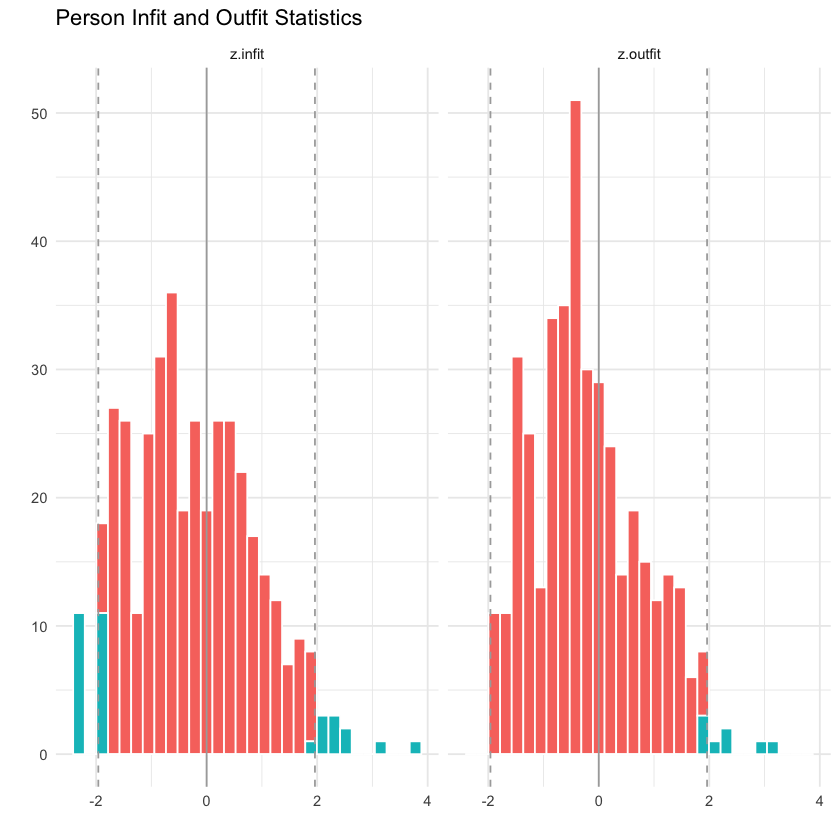

In [75]:
personfitPlot(mirt_rm)

Complessivamente, nel caso dei dati in esame, meno del 5% dei rispondenti mostra valori di outfit che eccedono la soglia di 1.96 o che sono inferiori a -1.96. Invece, l'8% dei rispondenti mostra valori di infit che eccedono la soglia di 1.96 o che sono inferiori a -1.96. Questi risultati suggeriscono che il modello di Rasch non è del tutto coerente con i dati esaminati.

### Grafici Specifici IRT

Oltre alla valutazione complessiva dell’adattamento del modello, ci possiamo chiedere quanto bene gli item coprono l’intervallo dell’abilità latente.
A tale domanda si può rispondere creando una “Mappa Item-Persona” (noto anche come Wright Map). Questa visualizzazione inizia tracciando la distribuzione dell’abilità latente nel campione studiato. Successivamente, tracciamo anche la difficoltà di ciascun item sulla stessa scala di theta. Allineando entrambi i grafici, possiamo vedere quanto bene gli item coprono l’abilità latente.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


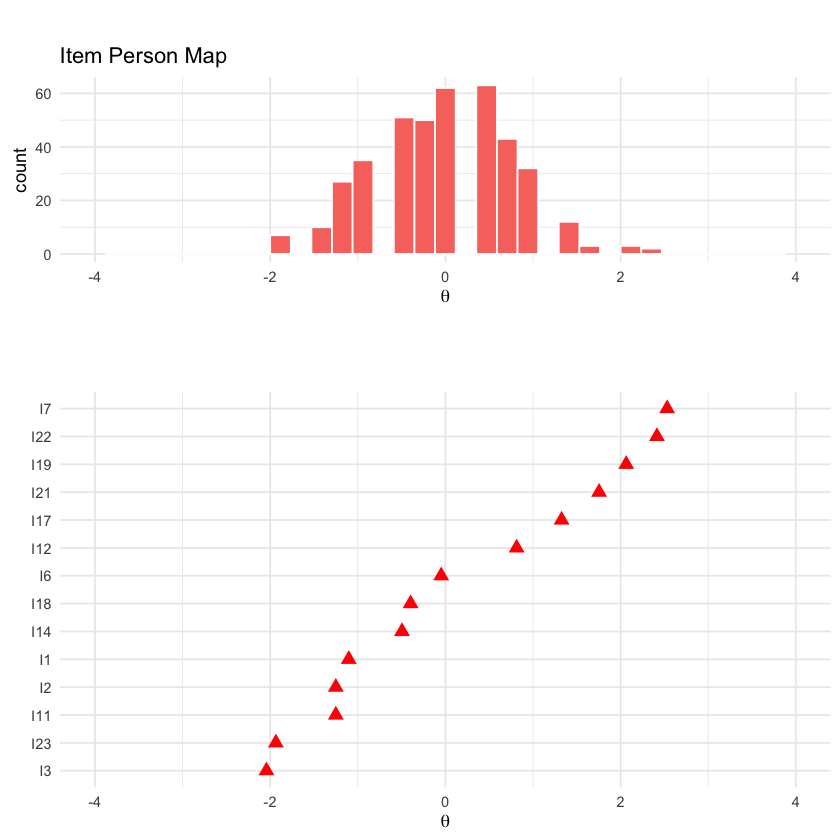

In [79]:
itempersonMap(mirt_rm)

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


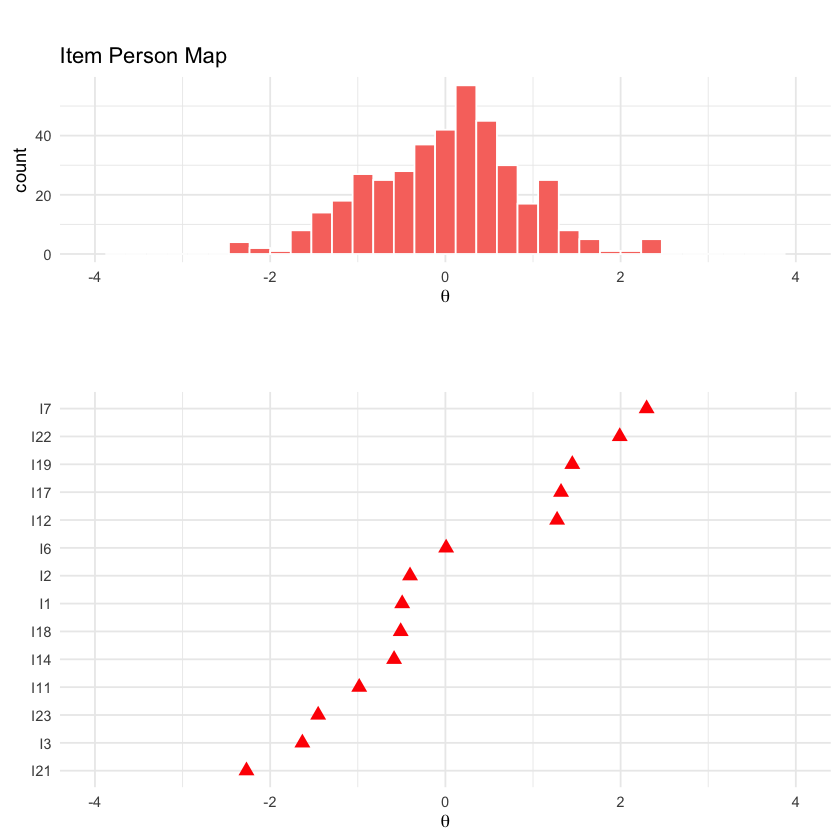

In [80]:
itempersonMap(mirt_3pl)

Nel caso presente vediamo che c'è un buon allineamento tra le abilità dei partecipanti e la difficoltà degli item.

## Funzione di Informazione dell'Item 

Un altro modo per valutare la qualità di ciascun item è tramite la creazione delle cosiddette funzioni di informazione degli item. L'informazione è un concetto statistico che si riferisce alla capacità di un item di stimare con precisione i punteggi su theta. L'informazione a livello di item chiarisce quanto bene ogni item contribuisca alla precisione nella stima dei punteggi, con livelli più elevati di informazione che portano a stime dei punteggi più accurate.

Per esempio:
- Un item con un'elevata informazione sarà molto utile per discriminare tra rispondenti con diversi livelli di abilità latente attorno a un certo punto della scala di theta. Questo significa che l'item fornisce dati affidabili e significativi sulla capacità o conoscenza che si sta misurando.
- Al contrario, un item con bassa informazione non aggiunge molto alla precisione della stima del punteggio. Questo potrebbe accadere se l'item è troppo facile o troppo difficile per la maggior parte dei rispondenti, o se non è strettamente correlato al tratto latente che si sta cercando di misurare.

La posizione delle Curve Caratteristiche degli Item (ICC) determina le regioni sul tratto latente dove ciascun item fornisce il massimo di informazione. Questo viene illustrato tramite la funzione dell'informazione dell'item.

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Oranges is 9
Returning the palette you asked for with that many colors
”
Warning message:
“Removed 4005 rows containing missing values or values outside the scale range
(`geom_line()`).”


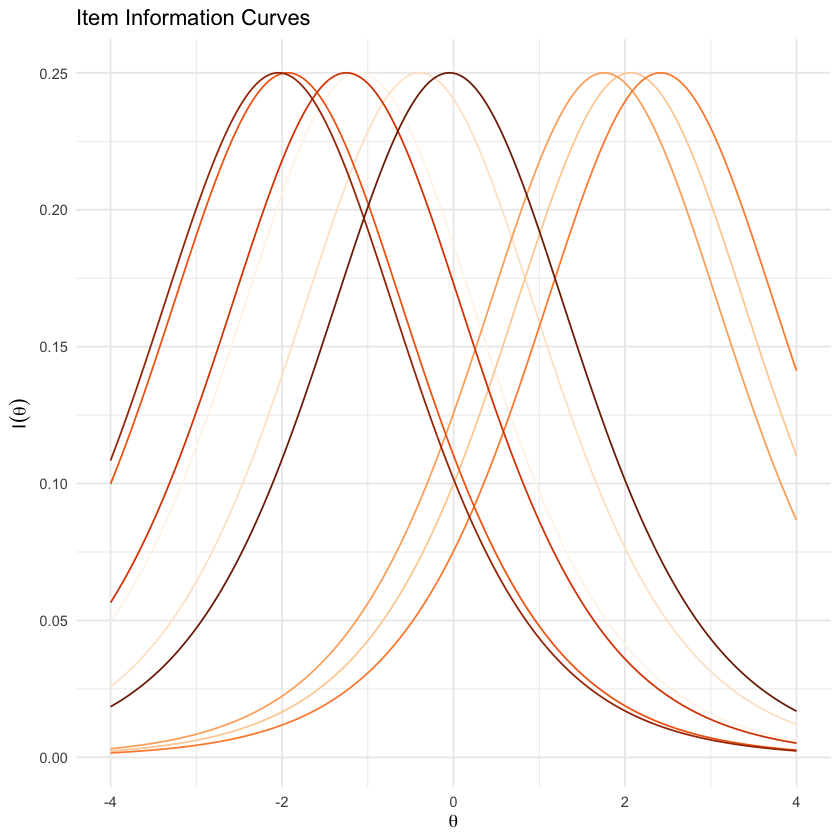

In [83]:
itemInfoPlot(mirt_rm)

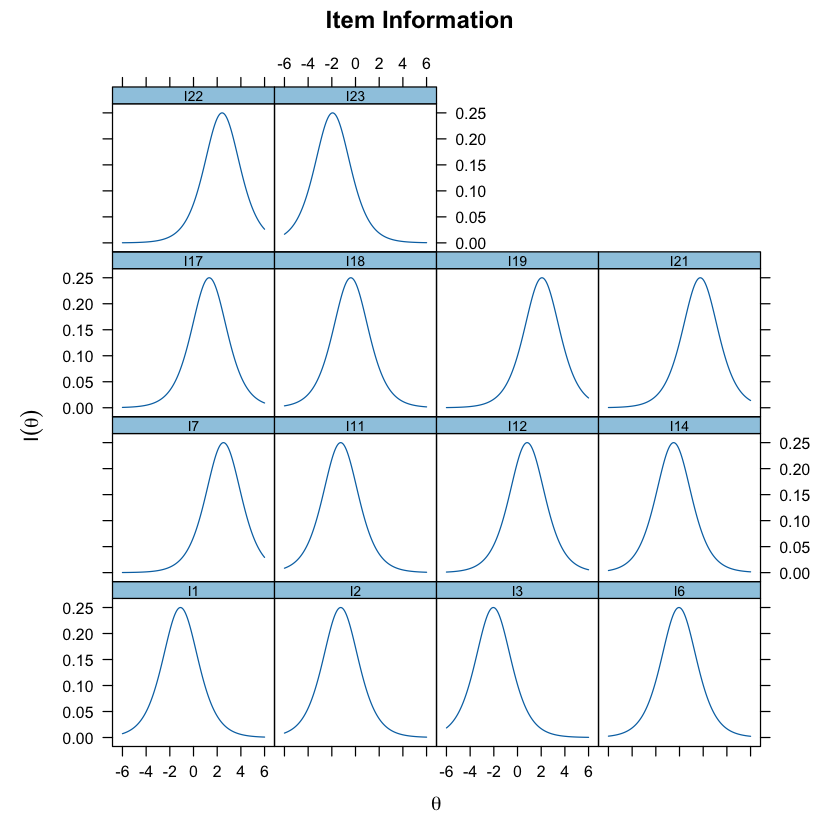

In [127]:
plot(mirt_rm, type = "infotrace")

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Oranges is 9
Returning the palette you asked for with that many colors
”
Warning message:
“Removed 4005 rows containing missing values or values outside the scale range
(`geom_line()`).”


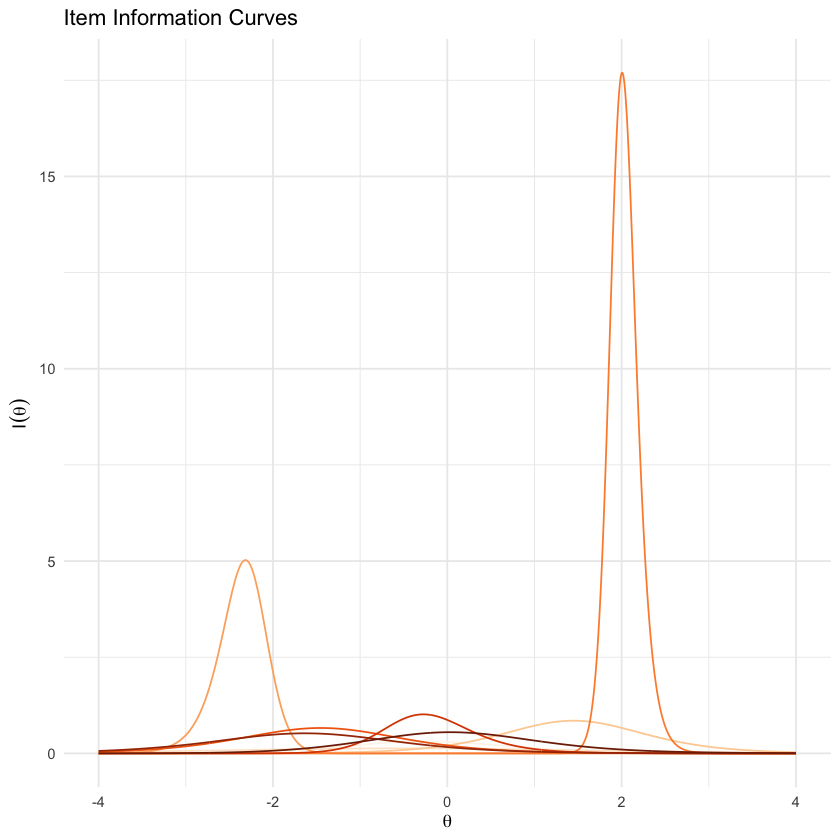

In [82]:
itemInfoPlot(mirt_3pl)

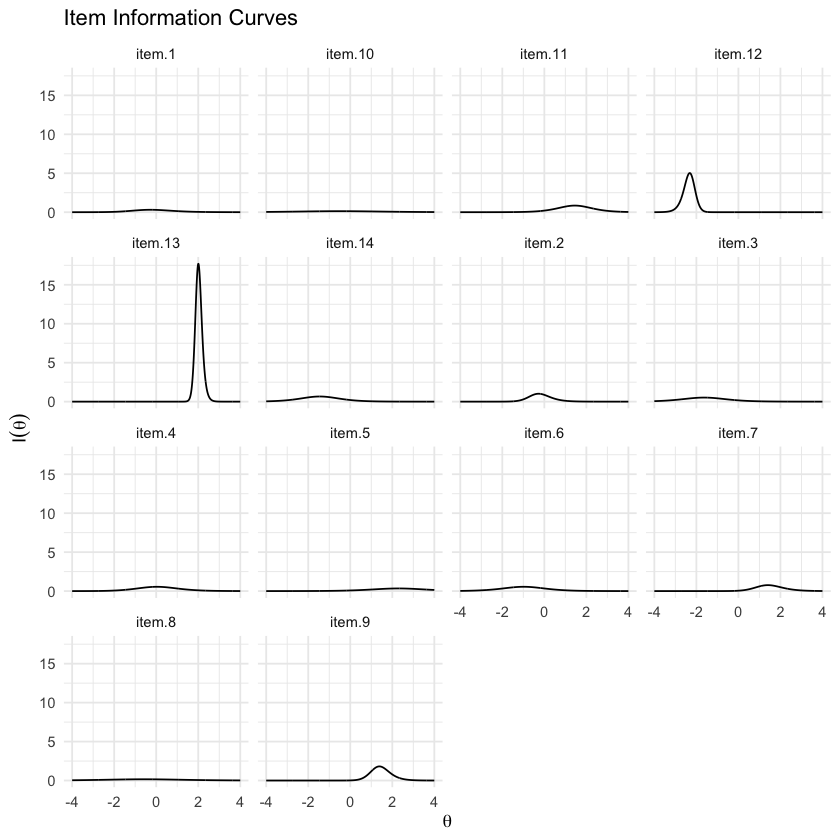

In [84]:
itemInfoPlot(mirt_3pl, facet = T)

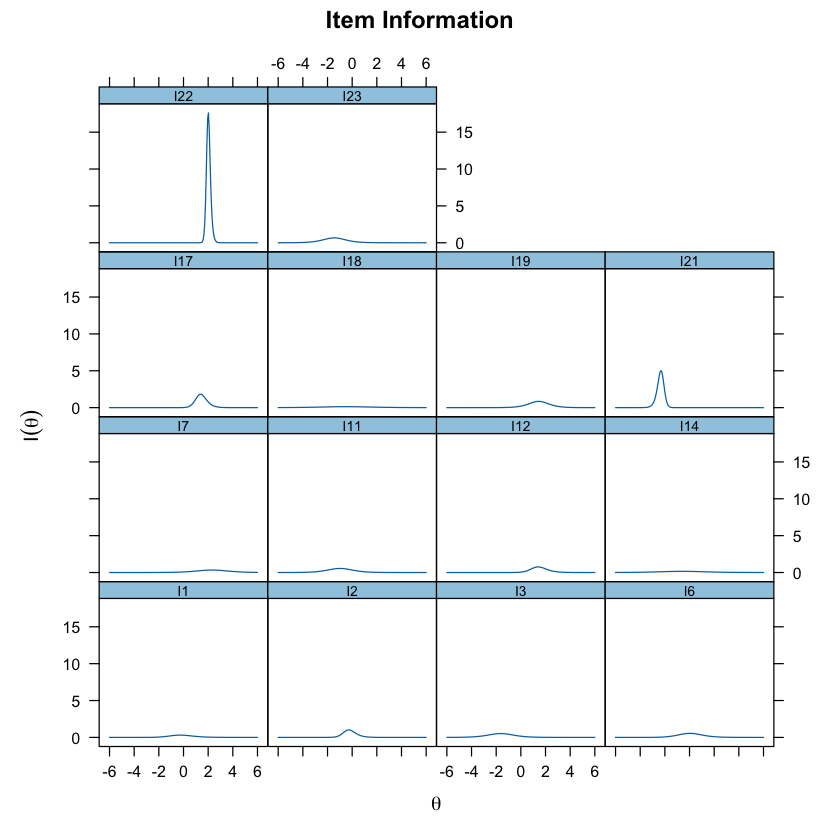

In [131]:
plot(mirt_3pl, type = "infotrace")

Qui vediamo chiaramente che alcuni item forniscono la maggior parte delle informazioni su livelli di $\theta$ più elevati, mentre altri coprono l'intera gamma di $\theta$.

### Funzione di Informazione del Test

Nel contesto della teoria IRT, la "funzione di informazione dell'item" (Item Information Function, IIF) di ciascun item può essere combinata per ottenere la "funzione di informazione del test" (Test Information Function, TIF). Questa aggregazione rivela come ogni item contribuisca specificatamente alla valutazione complessiva delle abilità del soggetto esaminato.

La funzione di informazione del test mostra in quali intervalli di abilità (theta) il test è più o meno preciso. Tipicamente, il test è ottimizzato per fornire stime accurate per i punteggi di theta tra -2 e +3, mostrando una precisione ridotta per le abilità agli estremi della scala. Ciò significa che il test è particolarmente efficace per valutare le abilità che sono nella media o leggermente superiori alla media, ma meno affidabile per abilità molto basse o molto elevate.

Per i dati presenti, per il modello di Rasch otteniamo:

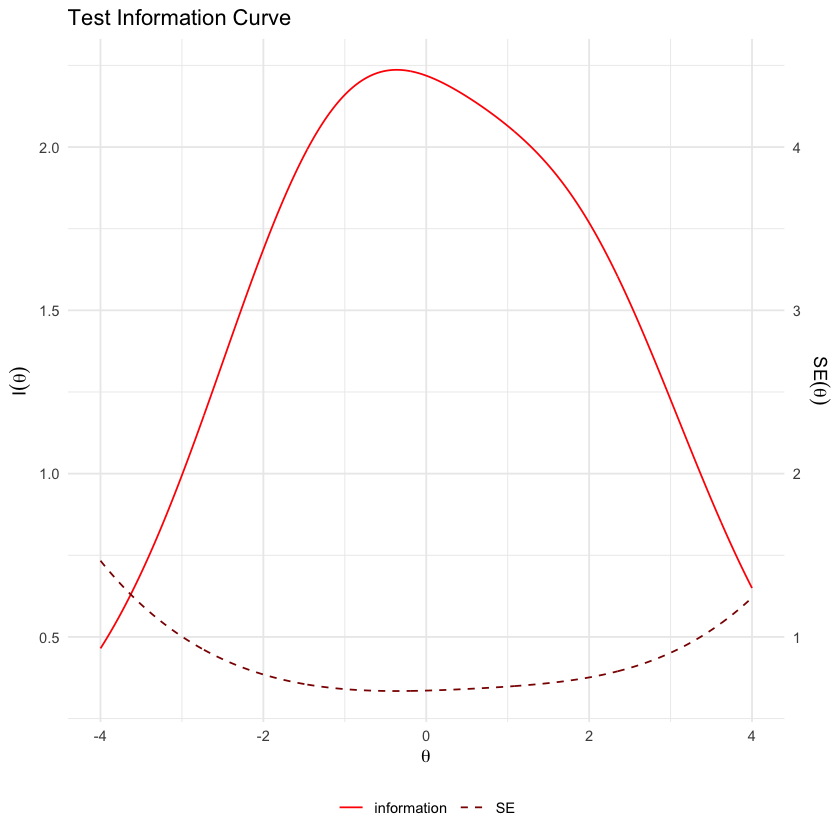

In [87]:
testInfoPlot(mirt_rm, adj_factor = 2)

Per il modello 3PL otteniamo:

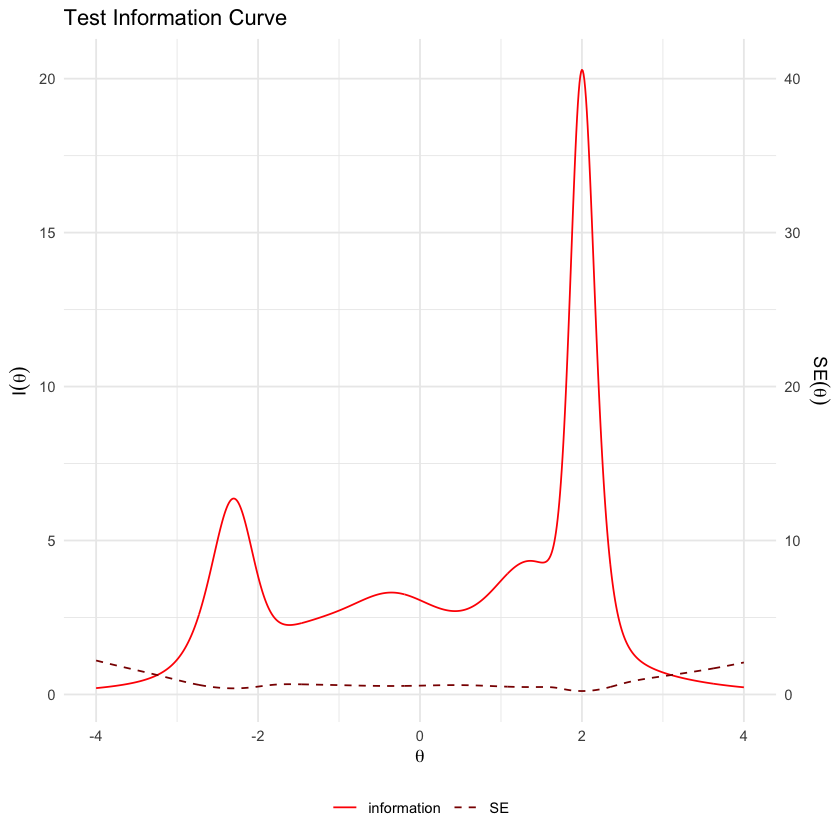

In [86]:
testInfoPlot(mirt_3pl, adj_factor = 2)

Si evidenzia che, tra i dati esaminati, il modello di Rasch offre stime più accurate per le abilità medie dei partecipanti. Al contrario, il modello 3PL si dimostra più preciso nelle stime per abilità estreme, sia piccole che grandi, dei rispondenti.

### Stima dei Parametri delle Persone

Possiamo stimare l'abilità dei rispondenti utilizzando la funzione `mirt::fscores()`. Per i modelli unidimensionali, gli argomenti più importanti di `fscores()` sono `object` e `method`. L'argomento `object` accetta il risultato della funzione `mirt()`. L'argomento `method` indica quale metodo utilizzare per stimare i parametri della persona. Per impostazione predefinita, `method="EAP"`, il che indica che il parametro della persona dovrebbe essere stimato utilizzando il metodo *expected a posteriori* (EAP). Possiamo calcolare le stime EAP per il modello di Rasch e stampare le sue prime sei voci come indicato di seguito:

In [140]:
theta_eap <- fscores(mirt_rm)
head(theta_eap)

F1
-0.2177416
-0.8276435
-0.8276435
-0.2177416
0.3913603
-0.5213117


Abbiamo visto in precedenza che una statistica sufficiente di $\theta$ nel modello di Rasch è data dalla somma dei punteggi corretti negli item. Verifichiamo:

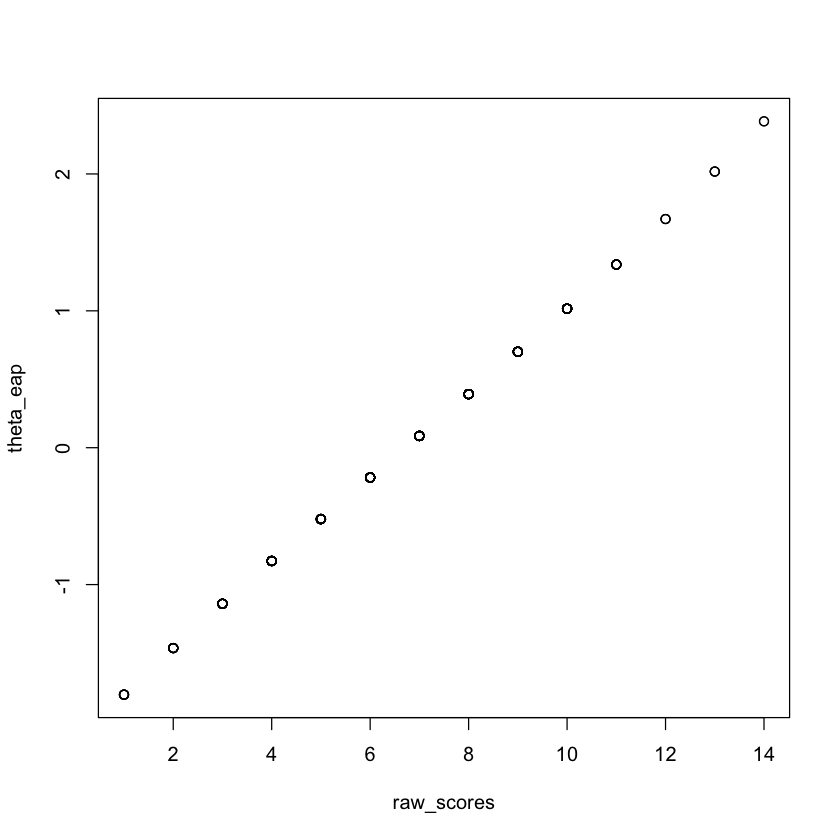

In [141]:
raw_scores <- rowSums(responses)

plot(raw_scores, theta_eap)

Questo invece non è vero nel caso dei modelli 2PL e 3PL:

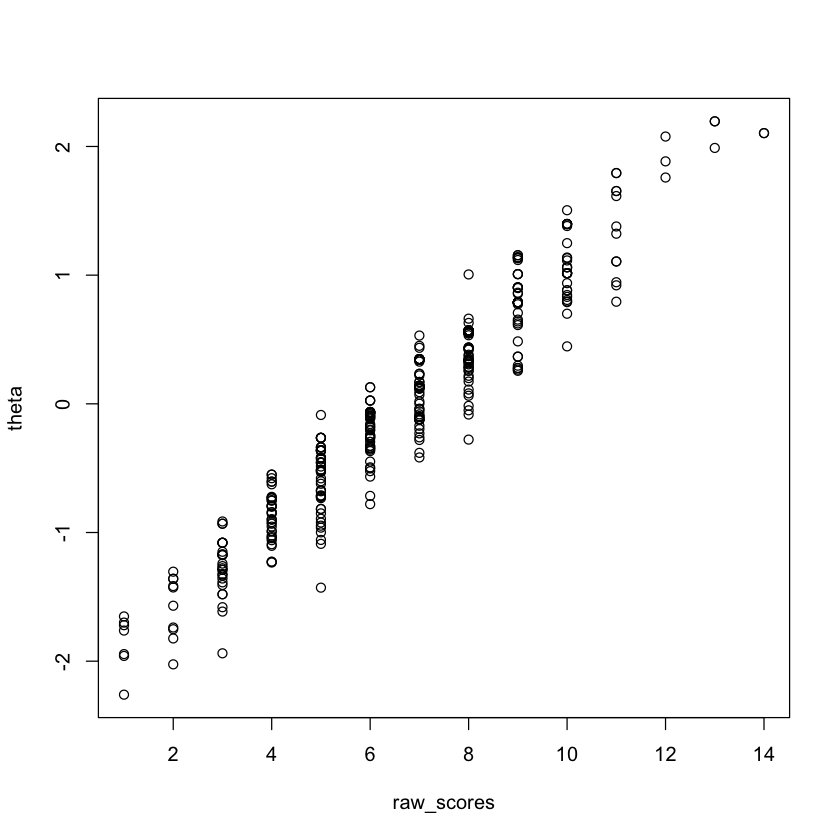

In [142]:
theta <- fscores(mirt_2pl)
plot(raw_scores, theta)

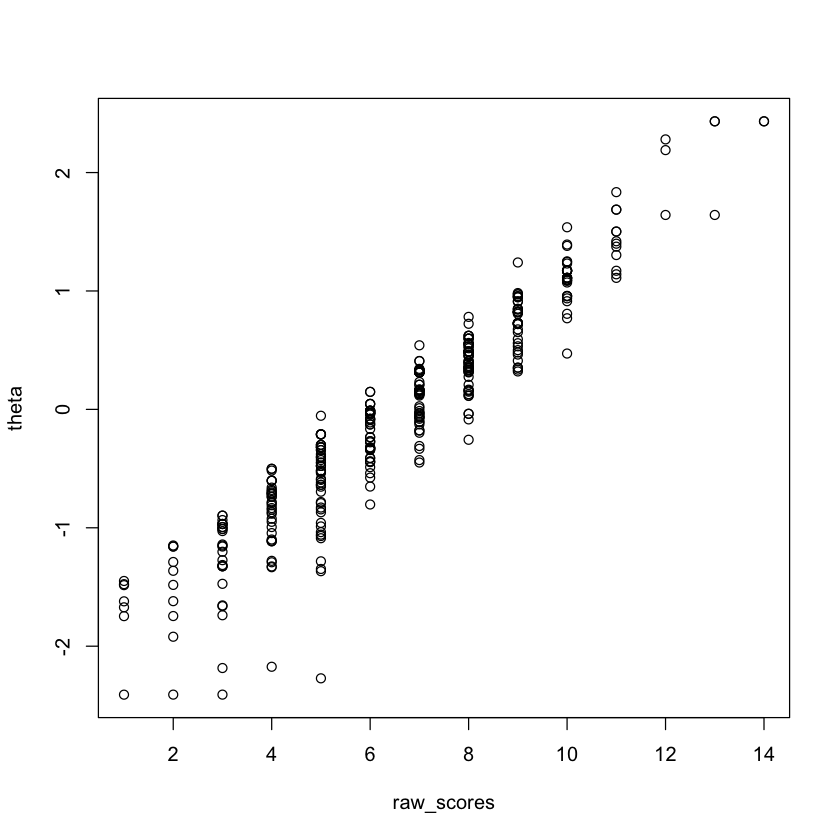

In [143]:
theta <- fscores(mirt_3pl)
plot(raw_scores, theta)

Un istogramma con le stime di abilità di ciascun rispondente del campione si ottiene nel modo seguente.

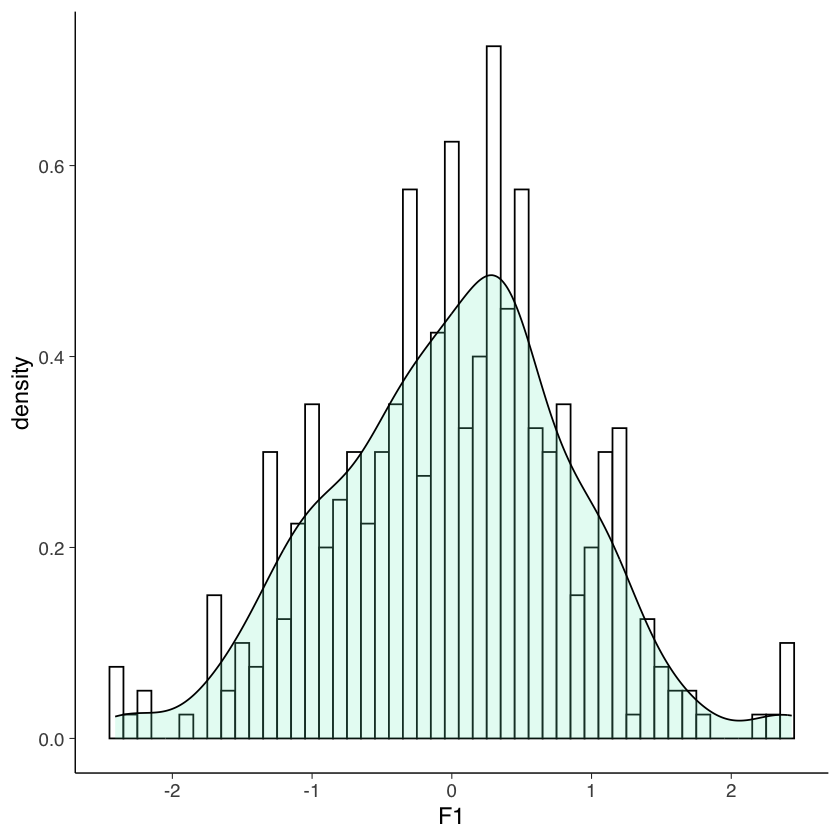

In [147]:
est_theta <- as.data.frame(fscores(mirt_3pl))
ggplot(est_theta, aes(x = F1)) + 
    geom_histogram(aes(y = ..density..), binwidth = 0.1, colour = "black", fill = "white") +
    geom_density(alpha = 0.2, fill = "aquamarine2")

Per impostazione predefinita mirt mostra solo le stime puntuali, ma è possibile aggiungere gli errori standard tramite l'opzione `full.scores.SE = TRUE` alla funzione `fscores()`. Gli errori standard dovrebbero essere esaminati prima di interpretare o riportare le stime dei parametri della persona.

La funzione `fscores()` fornisce anche stimatori di massima verosimiglianza (ML), massimo a posteriori (MAP) e likelihood ponderata (WLE). Ora confrontiamo i quattro tipi di stime dei parametri della persona fornite da `mirt`. Gli stimatori ML, MAP e WLE possono essere calcolati inserendo

In [111]:
theta_ml <- fscores(mirt_rm, method = "ML", max_theta = 30)
theta_map <- fscores(mirt_rm, method = "MAP")
theta_wle <- fscores(mirt_rm, method = "WLE")

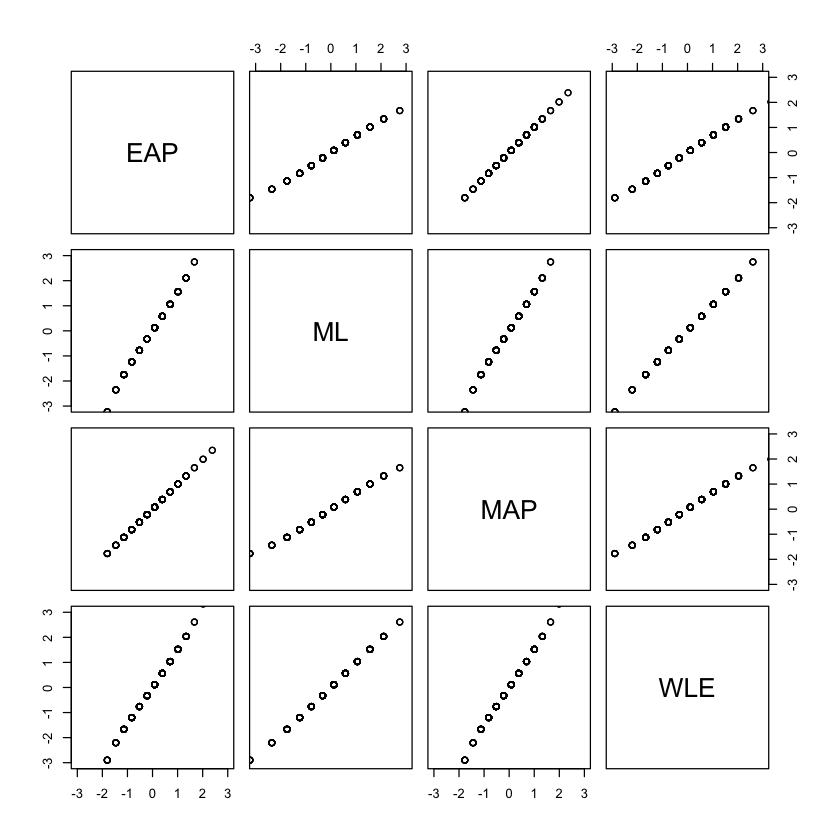

In [112]:
ests <- cbind(theta_eap, theta_ml, theta_map, theta_wle)
colnames(ests) <- c("EAP", "ML", "MAP", "WLE")
pairs(ests, xlim = c(-3, 3), ylim = c(-3, 3))

### Affidabilità Condizionale

Il concetto di affidabilità si distingue tra la Teoria Classica dei Test (CTT) e la Teoria della Risposta all'Item (IRT). In quest'ultima, si introduce il concetto di affidabilità condizionale, che si riferisce alla capacità di un test di misurare in modo affidabile l'abilità degli individui a diversi livelli di theta.

- Nella **CTT**, l'affidabilità di un test è generalmente vista come una caratteristica stabile e indipendente dal livello di abilità dei partecipanti. Questa viene comunemente calcolata utilizzando il coefficiente alfa di Cronbach o metodi simili, che non considerano le variazioni individuali nelle prestazioni dei test.
- Nell'**IRT**, al contrario, l'affidabilità è concepita come una proprietà che varia in funzione del livello di abilità del rispondente, rappresentato dal parametro theta. Pertanto, a diversi livelli di theta, il test può mostrare livelli di precisione variabili nella misurazione delle abilità.

L'affidabilità condizionale nell'IRT offre quindi una valutazione più specifica e dettagliata della capacità di un test di quantificare l'abilità a vari livelli di $\theta$, permettendo di identificare con maggiore precisione dove il test è più o meno efficace.

Consideriamo il modello di Rasch.

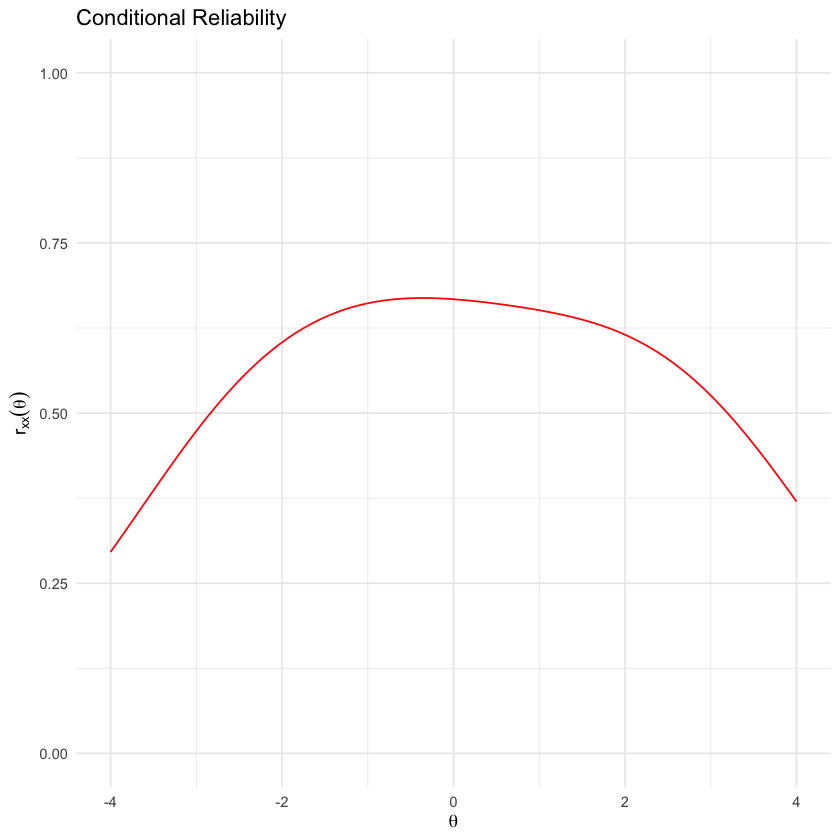

In [113]:
conRelPlot(mirt_rm)

Nel caso presente, 
- a livelli medi di $\theta$: Il test mostra una buona affidabilità, indicando che è in grado di distinguere con precisione tra rispondenti con abilità medie.
- agli estremi di $\theta$: Il test mostra un'affidabilità più bassa, suggerendo che non è altrettanto efficace nel distinguere tra livelli di abilità molto alti o molto bassi.

In sostanza, l'affidabilità condizionale nell'IRT ci fornisce una comprensione più dettagliata di dove il test funziona bene e dove potrebbe richiedere miglioramenti per valutare con precisione l'abilità su tutta la gamma di theta.

È comunque possibile calcolare un singolo valore di attendibilità:

In [114]:
marginal_rxx(mirt_rm)

[1] 0.6765296

Consideriamo ora il modello 3PL.

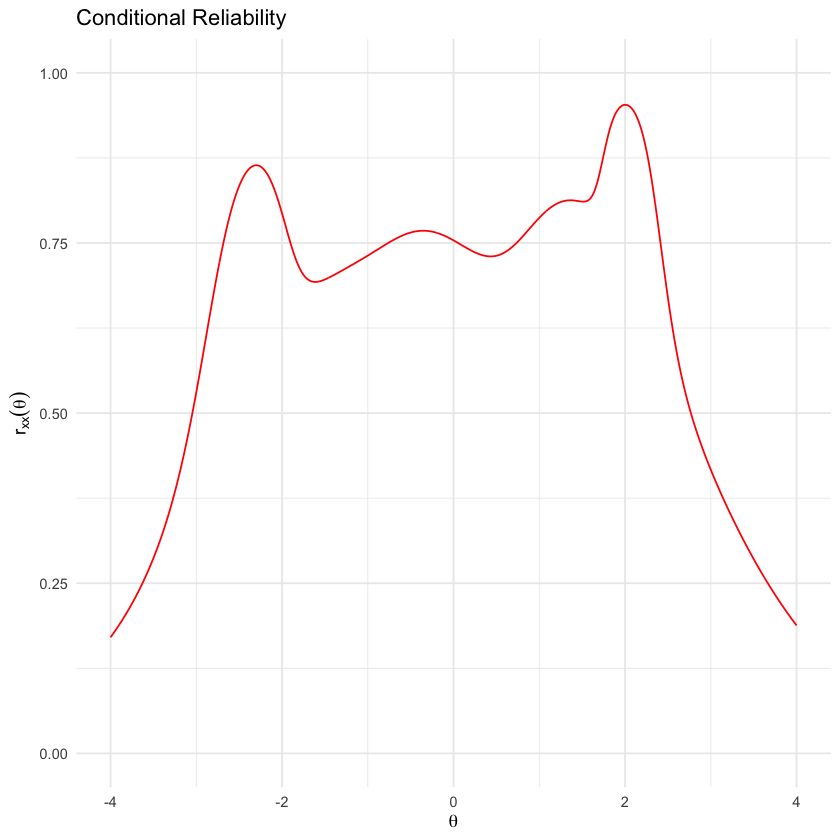

In [115]:
conRelPlot(mirt_3pl)

In [116]:
marginal_rxx(mirt_3pl)

[1] 0.7579852

### Curve Caratteristiche del Test

Un aspetto importante dei modelli di Teoria della Risposta all'Item (IRT) è che il punteggio totale delle risposte corrette (la somma dei punteggi attribuiti alle risposte esatte) costituisce una stima efficace del tratto latente sottostante. Le curve caratteristiche del test illustrano visivamente questa proprietà, mostrando la relazione tra il tratto latente (theta) e il punteggio complessivo delle risposte corrette.

- Questi grafici evidenziano come il punteggio totale delle risposte corrette sia correlato al livello di abilità latente stimato dal modello IRT.
- Per esempio, una curva che dimostra un aumento del punteggio totale di risposte corrette associato a livelli più elevati di theta suggerisce che il punteggio totale è un valido indicatore del tratto latente.
- Invece, se la curva non mostra una relazione chiara o lineare tra il punteggio totale e theta, ciò può indicare che il punteggio totale non riflette adeguatamente la complessità o le sfumature del tratto latente.

In conclusione, le curve caratteristiche del test forniscono un'efficace rappresentazione visiva di come il punteggio totale di risposte corrette possa riflettere l'abilità latente misurata dal test, offrendo un'utile prospettiva per valutare l'idoneità del punteggio totale come indicatore del tratto latente.

Esaminiamo la curva caratteristica del test nel caso del modello di Rasch.

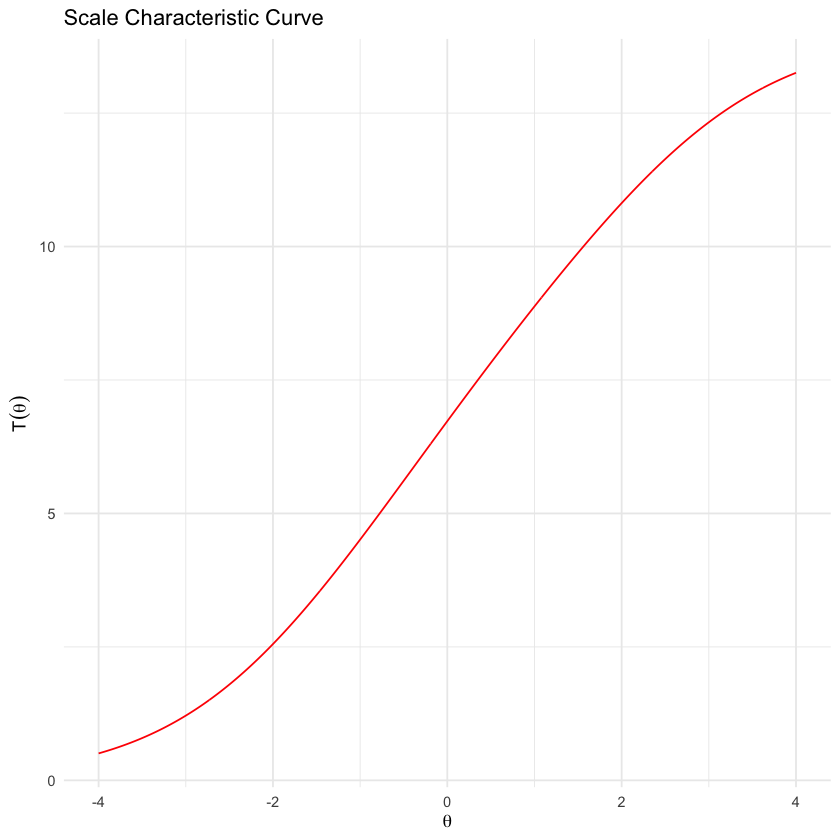

In [117]:
scaleCharPlot(mirt_rm)

Questa curva di solito assume la forma di una S, poiché la relazione è più forte nel range medio di theta e meno precisa agli estremi (come già visto nella curva di informazione del test). 

Possiamo ovviamente testare anche questo con una semplice correlazione. Per prima cosa, estraiamo il punteggio latente IRT utilizzando la funzione `fscores()`. Quindi lo correliamo con il punteggio di risposte corrette.

In [118]:
score <- fscores(mirt_rm)
sumscore <- rowSums(responses)
cor.test(score, sumscore)


	Pearson's product-moment correlation

data:  score and sumscore
t = 1097.1, df = 398, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9997988 0.9998642
sample estimates:
      cor 
0.9998347 


Nel caso presente, la correlazione è quasi perfetta.

Esaminiamo la curva caratteristica del test nel caso del modello 3PL.

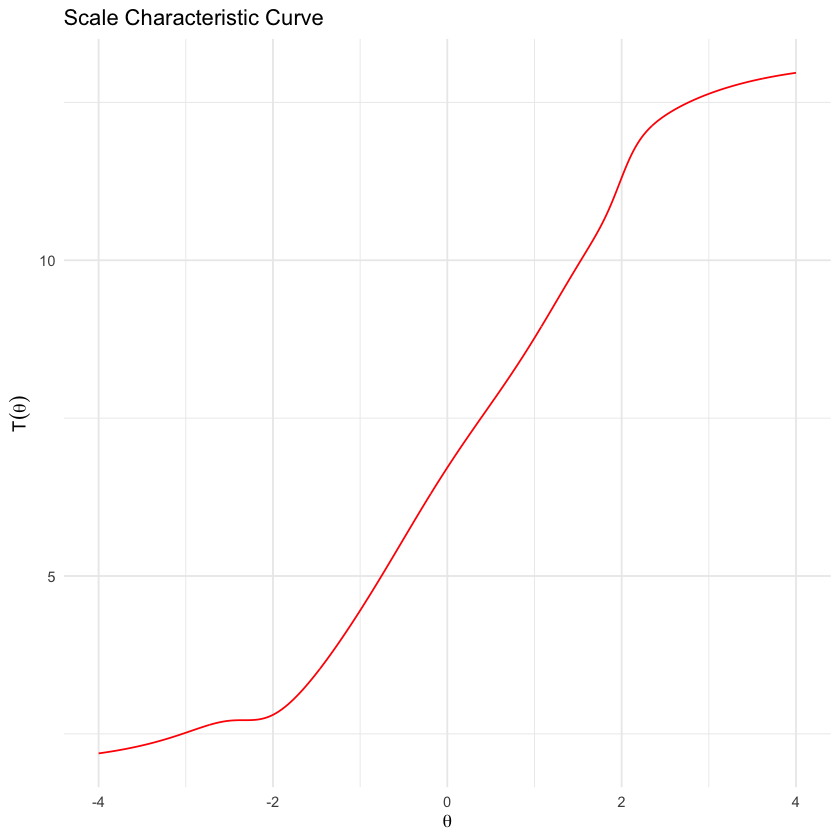

In [119]:
scaleCharPlot(mirt_3pl)

In entrambi i casi la risposta è molto simile.

## Considerazioni Conclusive

Tradizionalmente, il punteggio totale ottenuto in un test psicologico è stato considerato come la misura più efficace dell'abilità o della predisposizione di una persona rispetto a un certo tratto di personalità. Tuttavia, la dipendenza del punteggio totale dalla difficoltà degli item presenta limitazioni significative. Ad esempio, due persone possono ottenere lo stesso punteggio totale rispondendo in modo diverso a item di varia difficoltà, il che non riflette accuratamente le loro abilità reali.

Nella Teoria Classica dei Test (CTT), l'enfasi è posta sul punteggio totale, ma questa prospettiva ignora le variazioni nella difficoltà degli item e assume che gli errori di misurazione si annullino reciprocamente attraverso la procedura di sommazione. Tuttavia, la CTT è limitata dalla sua assunzione di varianze di errore uniformi per tutti i rispondenti, dall'aspettativa di errori di misurazione nulli e dalla focalizzazione esclusiva sui punteggi totali, senza considerare l'adattamento di item e persone.

Al contrario, la Teoria della Risposta all'Item (IRT) cambia il focus dai punteggi totali alle risposte a ciascun item, sfruttando le caratteristiche degli item. L'IRT descrive come attributi come abilità, atteggiamento o personalità, insieme alle caratteristiche degli item, influenzino la probabilità di fornire una risposta. Il Modello di Rasch, una forma semplice di IRT per risposte binarie, stabilisce una relazione diretta tra la probabilità di una risposta corretta e il livello di abilità del rispondente.

La stima dell'abilità in IRT non dipende dagli specifici item somministrati, permettendo di confrontare i risultati tra gruppi diversi con lo stesso set di item. Inoltre, la qualità degli item è valutata indipendentemente dal campione di rispondenti, rendendo le proprietà degli item costanti tra diversi gruppi con varie abilità.

L'IRT supera i limiti della CTT stimando congiuntamente le proprietà degli item e il livello di abilità dei rispondenti. Le caratteristiche degli item diventano indipendenti dal campione di individui utilizzato per costruire il test, permettendo la creazione di insiemi di item equivalenti per misurare abilità latenti. Questo approccio offre maggiore precisione e affidabilità nelle misurazioni, assicurando la comparabilità tra diversi gruppi di individui. In conclusione, l'IRT rappresenta un metodo statistico avanzato e versatile per una valutazione più accurata e affidabile di tratti e abilità in contesti psicometrici.

## Session Info

In [2]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Sonoma 14.3.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] latex2exp_0.9.6   psychotools_0.7-3 ggmirt_0.1.0      TAM_4.2-21       
 [5] CDM_8.2-6         mvtnorm_1.2-4     mirt_1.41         lattice_0.22-5   
 [9] eRm_1.0-4         ggokabeito_0.1.0  viridis_0.6.5     viridisLite_0.4.2
[13] ggpubr_0.6.0      ggExtra_0.10.1    bayesplot_1.11.1  gridExtra_2.3    
[17] patchwork_1.2.0   semTools_0.5-6    semPlot_1.1.6     lavaan_0.6-17    
[21] psych_2.4.1       scales_1.3.0      markdown_1.12     knitr_1